1. Dokładny opis danych, oraz ich źródło.


Dane pochodzą z witryny:https://archive.ics.uci.edu/dataset/10/automobile


In [8]:
# Importowanie bibliotek
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.utils import resample
from ucimlrepo import fetch_ucirepo

# Ustawienia dla wykresów
plt.style.use('seaborn-v0_8')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
sns.set_palette("viridis")

# Pobranie danych
automobile = fetch_ucirepo(id=10)

# Wyodrębnienie ramki danych i informacji o atrybutach
X = automobile.data.features
y = automobile.data.targets
df = pd.concat([X, y], axis=1)

# Wyświetlenie informacji o zbiorze danych
print(f"Nazwa zbioru danych: {automobile.metadata.name}")
print(f"Liczba instancji: {automobile.metadata.num_instances}")
print(f"Liczba atrybutów: {automobile.metadata.num_features}")
print(f"Źródło danych: UCI Machine Learning Repository")

# Podstawowe informacje o strukturze danych
print("\nStruktura danych:")
print(df.info())

# Pierwsze wiersze danych
print("\nPierwszych 5 wierszy danych:")
print(df.head())

# Opis zmiennych
print("\nOpis zmiennych numerycznych:")
print(df.describe())

# Sprawdzenie brakujących wartości
print("\nLiczba brakujących wartości w każdej kolumnie:")
print(df.isnull().sum())

# Zastąpienie brakujących wartości
# Zmiana wartości '?' na NaN
for column in df.columns:
    if df[column].dtype == object:
        df[column] = df[column].replace('?', np.nan)

# Konwersja kolumn numerycznych z wartościami '?' na typ float
numeric_columns = ['normalized-losses', 'bore', 'stroke', 'horsepower', 'peak-rpm', 'price']
for column in numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')

# Uzupełnianie brakujących wartości medianą dla zmiennych numerycznych
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column] = df[column].fillna(df[column].median())

# Uzupełnianie brakujących wartości najczęstszym wystąpieniem dla zmiennych kategorycznych
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])

print("\nLiczba brakujących wartości po uzupełnieniu:")
print(df.isnull().sum())

Nazwa zbioru danych: Automobile
Liczba instancji: 205
Liczba atrybutów: 25
Źródło danych: UCI Machine Learning Repository

Struktura danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price              201 non-null    float64
 1   highway-mpg        205 non-null    int64  
 2   city-mpg           205 non-null    int64  
 3   peak-rpm           203 non-null    float64
 4   horsepower         203 non-null    float64
 5   compression-ratio  205 non-null    float64
 6   stroke             201 non-null    float64
 7   bore               201 non-null    float64
 8   fuel-system        205 non-null    object 
 9   engine-size        205 non-null    int64  
 10  num-of-cylinders   205 non-null    int64  
 11  engine-type        205 non-null    object 
 12  curb-weight        205 non-null    int64  
 13  height             205 non-nu

2. Estymacja parametrów rozkładu (punktowa) (średnia, odchylenie standardowe,
odchylenie przeciętne, mediana, moda, wariancja, kurtoza, skośność, IQR, kwantyle, itp)



--- Parametry zmiennej 'price' ---
Średnia: 13150.3073
Średnia geometryczna: 11475.3282
Średnia harmoniczna: 10288.2005
Mediana: 10295.0000
Moda: 10295.0000
Wariancja (próbkowa): 62080552.8708
Wariancja (populacyjna): 61777720.9056
Odchylenie standardowe (próbkowe): 7879.1213
Odchylenie standardowe (populacyjne): 7859.8805
Odchylenie przeciętne: 5768.7215
Odchylenie ćwiartkowe: 4356.0000
Współczynnik zmienności: 59.9159
Skośność: 1.8410
Współczynnik asymetrii Pearsona: 1.0872
Kurtoza: 3.3749
Eksces: 3.3749
Minimum: 5118.0000
Maximum: 45400.0000
Zakres: 40282.0000
Q1 (25%): 7788.0000
Q2 (50%): 10295.0000
Q3 (75%): 16500.0000
P10 (10%): 6657.0000
P90 (90%): 22289.2000
P95 (95%): 32472.4000
P99 (99%): 40802.7200
IQR: 8712.0000
Błąd standardowy średniej: 550.3017
Suma: 2695813.0000
Liczba obserwacji: 205.0000
Liczba unikalnych wartości: 186.0000
Moment centralny rzędu 1: -0.0000
Moment centralny rzędu 2: 61777720.9056
Moment centralny rzędu 3: 887361852558.2919
Moment centralny rzędu 4: 2

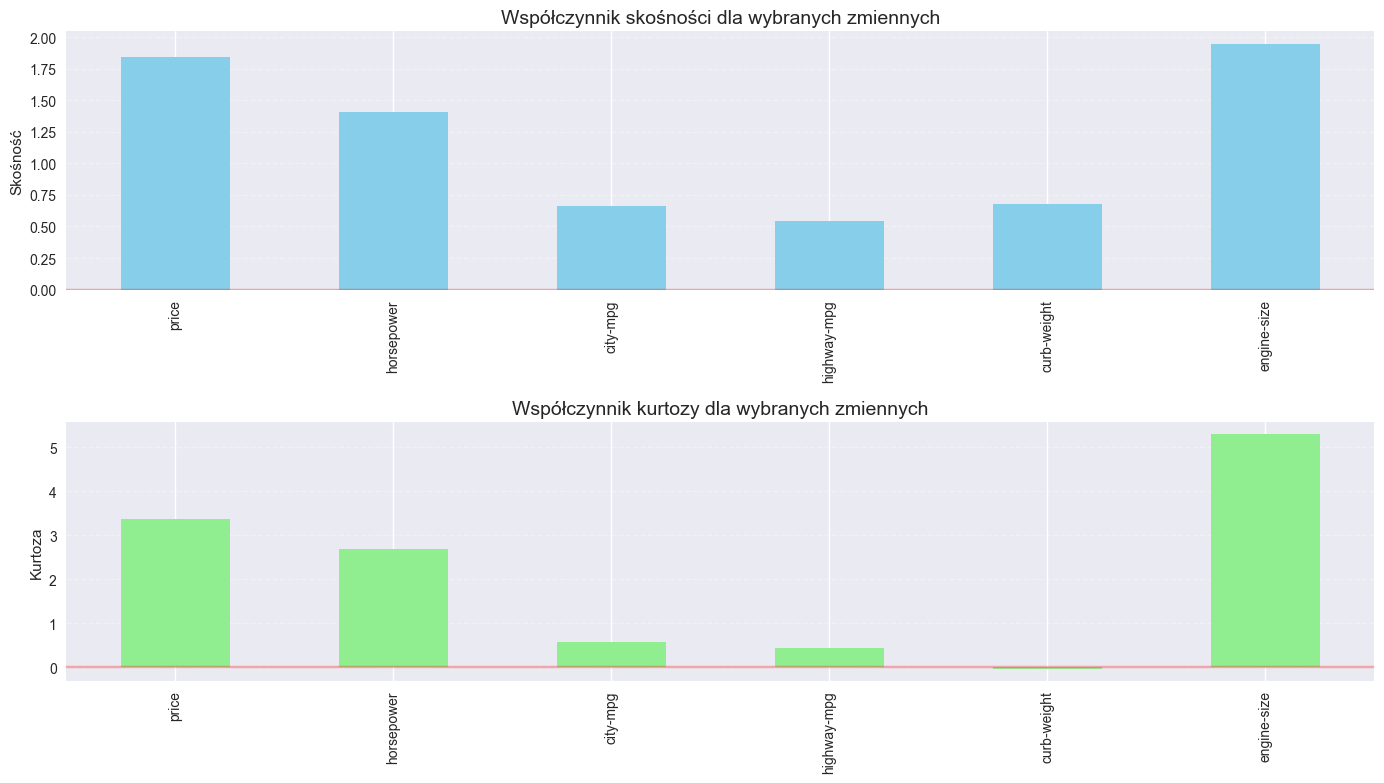

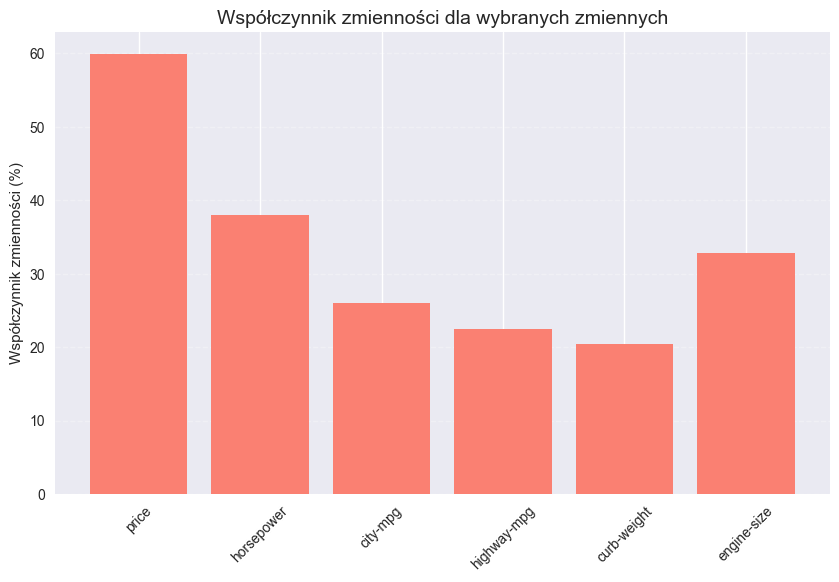

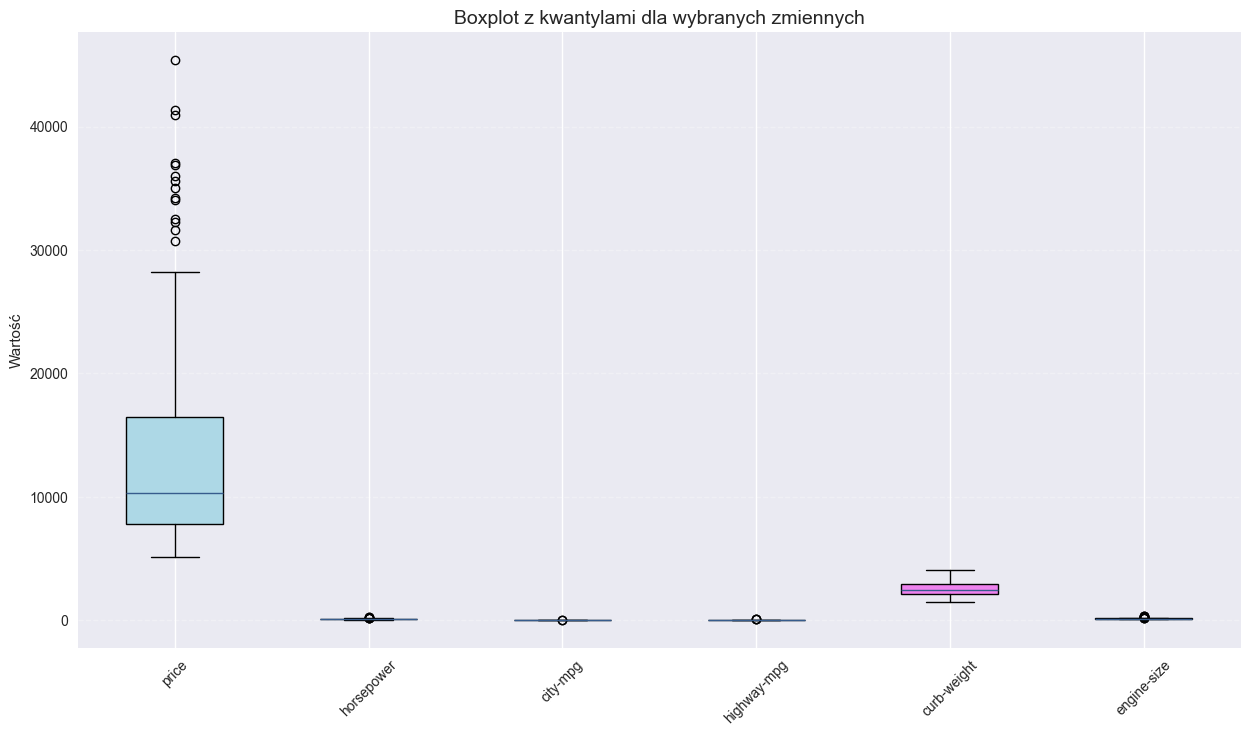


--- Interpretacja wybranych parametrów rozkładu ---

Zmienna: price
- Rozkład jest prawostronnie asymetryczna (wartość 1.8410)
- Rozkład jest leptokurtyczny (smuklejszy niż normalny, wartość 3.3749)
- Zbiór jest silnie zróżnicowany (CV = 59.92%)
- Średnia i mediana średnia (13150.31) jest większa od mediany (10295.00)

Zmienna: horsepower
- Rozkład jest prawostronnie asymetryczna (wartość 1.4034)
- Rozkład jest leptokurtyczny (smuklejszy niż normalny, wartość 2.6852)
- Zbiór jest silnie zróżnicowany (CV = 37.95%)
- Średnia i mediana średnia (104.17) jest większa od mediany (95.00)

Zmienna: city-mpg
- Rozkład jest prawostronnie asymetryczna (wartość 0.6637)
- Rozkład jest leptokurtyczny (smuklejszy niż normalny, wartość 0.5786)
- Zbiór jest średnio zróżnicowany (CV = 25.94%)
- Średnia i mediana średnia (25.22) jest większa od mediany (24.00)

Zmienna: highway-mpg
- Rozkład jest prawostronnie asymetryczna (wartość 0.5400)
- Rozkład jest zbliżony do normalnego
- Zbiór jest średnio zróżn

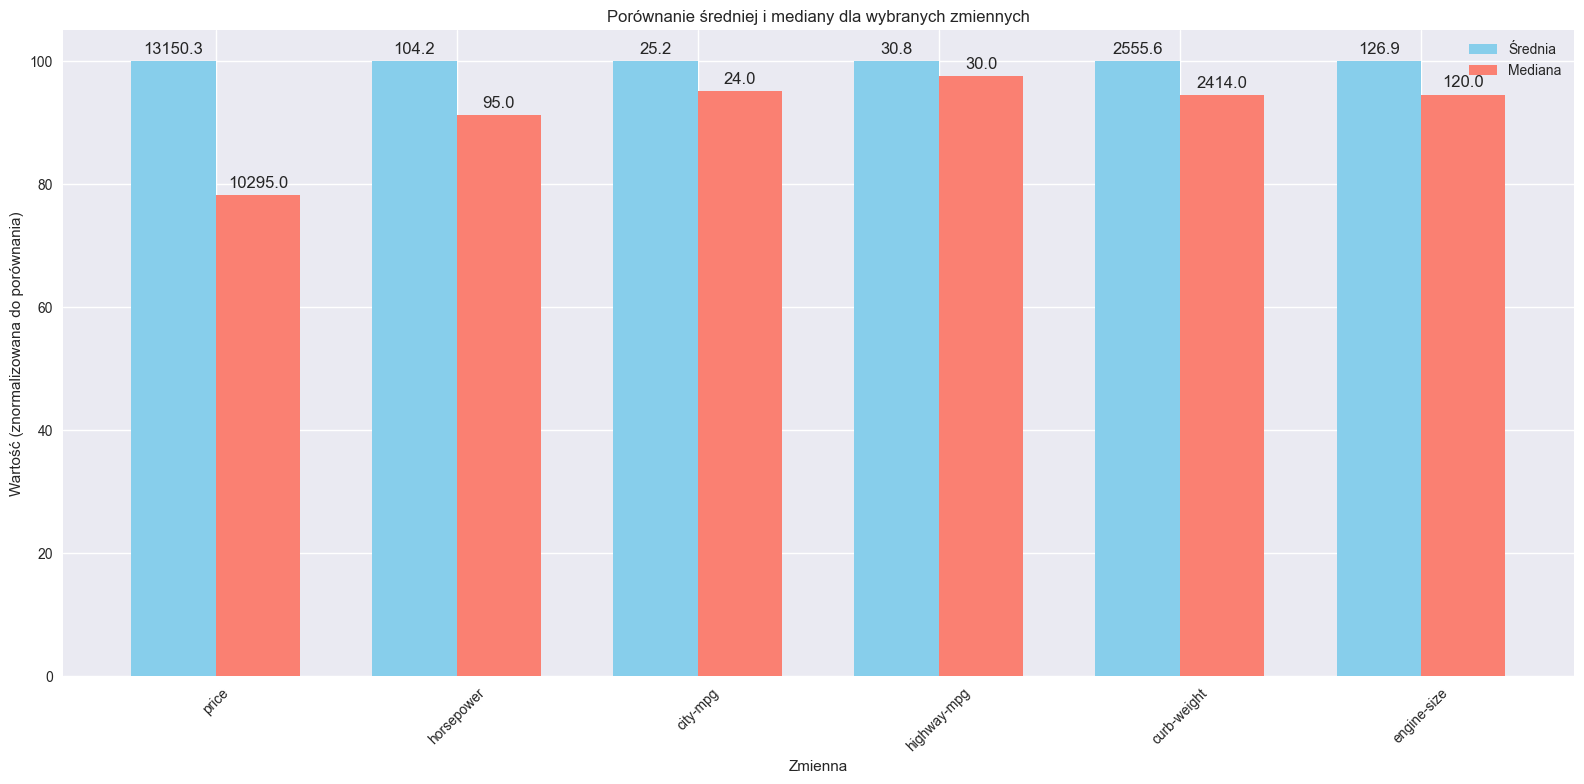

In [15]:
# Wybór zmiennych liczbowych do analizy
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Utworzenie funkcji dla estymacji parametrów punktowych
def calculate_distribution_parameters(data):
    params = {}
    # Miary tendencji centralnej
    params['Średnia'] = data.mean()
    params['Średnia geometryczna'] = stats.gmean(data) if all(data > 0) else np.nan
    params['Średnia harmoniczna'] = stats.hmean(data) if all(data > 0) else np.nan
    params['Mediana'] = data.median()
    params['Moda'] = data.mode()[0]
    
    # Miary rozproszenia
    params['Wariancja (próbkowa)'] = data.var(ddof=1)
    params['Wariancja (populacyjna)'] = data.var(ddof=0)
    params['Odchylenie standardowe (próbkowe)'] = data.std(ddof=1)
    params['Odchylenie standardowe (populacyjne)'] = data.std(ddof=0)
    params['Odchylenie przeciętne'] = (data - data.mean()).abs().mean()
    params['Odchylenie ćwiartkowe'] = (np.percentile(data, 75) - np.percentile(data, 25))/2
    params['Współczynnik zmienności'] = (data.std()/data.mean())*100 if data.mean() != 0 else np.nan
    
    # Miary kształtu rozkładu
    params['Skośność'] = stats.skew(data, bias=False)
    params['Współczynnik asymetrii Pearsona'] = 3 * (data.mean() - data.median()) / data.std() if data.std() != 0 else np.nan
    params['Kurtoza'] = stats.kurtosis(data, bias=False)
    params['Eksces'] = stats.kurtosis(data, bias=False, fisher=True)  # Nadwyżka kurtozy (kurtoza - 3)
    
    # Kwantyle i miary pozycyjne
    params['Minimum'] = data.min()
    params['Maximum'] = data.max()
    params['Zakres'] = data.max() - data.min()
    params['Q1 (25%)'] = np.percentile(data, 25)
    params['Q2 (50%)'] = np.percentile(data, 50)
    params['Q3 (75%)'] = np.percentile(data, 75)
    params['P10 (10%)'] = np.percentile(data, 10)
    params['P90 (90%)'] = np.percentile(data, 90)
    params['P95 (95%)'] = np.percentile(data, 95)
    params['P99 (99%)'] = np.percentile(data, 99)
    params['IQR'] = np.percentile(data, 75) - np.percentile(data, 25)
    
    # Dodatkowe statystyki
    params['Błąd standardowy średniej'] = data.std(ddof=1) / np.sqrt(len(data))
    params['Suma'] = data.sum()
    params['Liczba obserwacji'] = len(data)
    params['Liczba unikalnych wartości'] = data.nunique()
    
    # Momenty centralne
    params['Moment centralny rzędu 1'] = np.mean((data - data.mean()) ** 1)
    params['Moment centralny rzędu 2'] = np.mean((data - data.mean()) ** 2)
    params['Moment centralny rzędu 3'] = np.mean((data - data.mean()) ** 3)
    params['Moment centralny rzędu 4'] = np.mean((data - data.mean()) ** 4)
    
    return params

# Analiza wybranych zmiennych numerycznych
selected_variables = ['price', 'horsepower', 'city-mpg', 'highway-mpg', 'curb-weight', 'engine-size']

# Wyświetlenie parametrów dla wybranych zmiennych
for var in selected_variables:
    print(f"\n--- Parametry zmiennej '{var}' ---")
    params = calculate_distribution_parameters(df[var])
    for name, value in params.items():
        if isinstance(value, (int, float)) and not np.isnan(value):
            print(f"{name}: {value:.4f}")
        else:
            print(f"{name}: {value}")

# Stworzenie tablicy porównawczej głównych parametrów dla wszystkich wybranych zmiennych
comparison_params = ['Średnia', 'Mediana', 'Odchylenie standardowe (próbkowe)', 'Skośność', 'Kurtoza', 'IQR']
comparison_df = pd.DataFrame(index=comparison_params, columns=selected_variables)

for var in selected_variables:
    params = calculate_distribution_parameters(df[var])
    for param in comparison_params:
        comparison_df.loc[param, var] = params[param]

print("\n--- Tabela porównawcza głównych parametrów rozkładu ---")
print(comparison_df)

# Wizualizacja porównawcza parametrów kształtu
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
comparison_df.loc['Skośność'].plot(kind='bar', color='skyblue')
plt.title('Współczynnik skośności dla wybranych zmiennych', fontsize=14)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylabel('Skośność')

plt.subplot(2, 1, 2)
comparison_df.loc['Kurtoza'].plot(kind='bar', color='lightgreen')
plt.title('Współczynnik kurtozy dla wybranych zmiennych', fontsize=14)
plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylabel('Kurtoza')

plt.tight_layout()
plt.show()

# Wizualizacja współczynnika zmienności
cv_values = [calculate_distribution_parameters(df[var])['Współczynnik zmienności'] for var in selected_variables]
plt.figure(figsize=(10, 6))
plt.bar(selected_variables, cv_values, color='salmon')
plt.title('Współczynnik zmienności dla wybranych zmiennych', fontsize=14)
plt.ylabel('Współczynnik zmienności (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# Boxplot z zaznaczonymi kwantylami
plt.figure(figsize=(15, 8))
box = plt.boxplot([df[var] for var in selected_variables], patch_artist=True, labels=selected_variables)

# Kolorowanie boxplotów
colors = ['lightblue', 'lightgreen', 'salmon', 'khaki', 'violet', 'lightskyblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Boxplot z kwantylami dla wybranych zmiennych', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.ylabel('Wartość')
plt.show()

# Interpretacja parametrów rozkładu
print("\n--- Interpretacja wybranych parametrów rozkładu ---")
for var in selected_variables:
    params = calculate_distribution_parameters(df[var])
    skewness = params['Skośność']
    kurtosis = params['Kurtoza']
    cv = params['Współczynnik zmienności']
    
    print(f"\nZmienna: {var}")
    
    # Interpretacja skośności
    if abs(skewness) < 0.5:
        skew_interp = "bliska symetrii"
    elif skewness > 0:
        skew_interp = f"prawostronnie asymetryczna (wartość {skewness:.4f})"
    else:
        skew_interp = f"lewostronnie asymetryczna (wartość {skewness:.4f})"
    print(f"- Rozkład jest {skew_interp}")
    
    # Interpretacja kurtozy
    if abs(kurtosis) < 0.5:
        kurt_interp = "zbliżony do normalnego"
    elif kurtosis > 0:
        kurt_interp = f"leptokurtyczny (smuklejszy niż normalny, wartość {kurtosis:.4f})"
    else:
        kurt_interp = f"platykurtyczny (bardziej spłaszczony niż normalny, wartość {kurtosis:.4f})"
    print(f"- Rozkład jest {kurt_interp}")
    
    # Interpretacja współczynnika zmienności
    if cv < 10:
        cv_interp = f"mało zróżnicowany (CV = {cv:.2f}%)"
    elif cv < 30:
        cv_interp = f"średnio zróżnicowany (CV = {cv:.2f}%)"
    else:
        cv_interp = f"silnie zróżnicowany (CV = {cv:.2f}%)"
    print(f"- Zbiór jest {cv_interp}")
    
    # Relacja między średnią a medianą
    mean = params['Średnia']
    median = params['Mediana']
    if abs(mean - median)/mean < 0.01:
        mean_med_interp = "są prawie równe"
    elif mean > median:
        mean_med_interp = f"średnia ({mean:.2f}) jest większa od mediany ({median:.2f})"
    else:
        mean_med_interp = f"mediana ({median:.2f}) jest większa od średniej ({mean:.2f})"
    print(f"- Średnia i mediana {mean_med_interp}")

# Dodatkowa wizualizacja - miary tendencji centralnej
plt.figure(figsize=(16, 8))
x = np.arange(len(selected_variables))
width = 0.35

means = [calculate_distribution_parameters(df[var])['Średnia'] for var in selected_variables]
medians = [calculate_distribution_parameters(df[var])['Mediana'] for var in selected_variables]

# Standaryzacja wartości do wykresu
max_values = [max(m, med) for m, med in zip(means, medians)]
scaling_factors = [100/val if val != 0 else 1 for val in max_values]
scaled_means = [m*s for m, s in zip(means, scaling_factors)]
scaled_medians = [m*s for m, s in zip(medians, scaling_factors)]

bars1 = plt.bar(x - width/2, scaled_means, width, label='Średnia', color='skyblue')
bars2 = plt.bar(x + width/2, scaled_medians, width, label='Mediana', color='salmon')

plt.xlabel('Zmienna')
plt.ylabel('Wartość (znormalizowana do porównania)')
plt.title('Porównanie średniej i mediany dla wybranych zmiennych')
plt.xticks(x, selected_variables, rotation=45)
plt.legend()

# Dodanie etykiet z rzeczywistymi wartościami
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    plt.annotate(f'{means[i]:.1f}', 
                 xy=(bar1.get_x() + bar1.get_width()/2, bar1.get_height()),
                 xytext=(0, 3),  
                 textcoords="offset points",  
                 ha='center', va='bottom')
    
    plt.annotate(f'{medians[i]:.1f}', 
                 xy=(bar2.get_x() + bar2.get_width()/2, bar2.get_height()),
                 xytext=(0, 3),  
                 textcoords="offset points",  
                 ha='center', va='bottom')

plt.tight_layout()
plt.show()

3. Estymacja parametrów (przedziałowa) (przedział ufności dla wariancji i dla średniej) oraz
metoda nieparametryczna (bootstrap) dla średniej i porównanie


Tabela porównawcza przedziałów ufności (poziom ufności 95%):
       Zmienna   Średnia  CI_t_dolny  CI_t_górny  CI_bootstrap_dolny  \
0        price  13150.31    12065.30    14235.32            12127.33   
1   horsepower    104.17       98.72      109.61               98.83   
2     city-mpg     25.22       24.32       26.12               24.34   
3  highway-mpg     30.75       29.80       31.70               29.83   
4  curb-weight   2555.57     2483.86     2627.27             2485.19   
5  engine-size    126.91      121.17      132.64              121.33   

   CI_bootstrap_górny    Wariancja  CI_var_dolny  CI_var_górny  
0            14284.48  62080552.87   51597147.74   76136912.12  
1              109.44      1562.60       1298.73       1916.41  
2               26.12        42.80         35.57         52.49  
3               31.66        47.42         39.41         58.16  
4             2627.42    271107.87     225326.49     332492.47  
5              132.64      1734.11       144

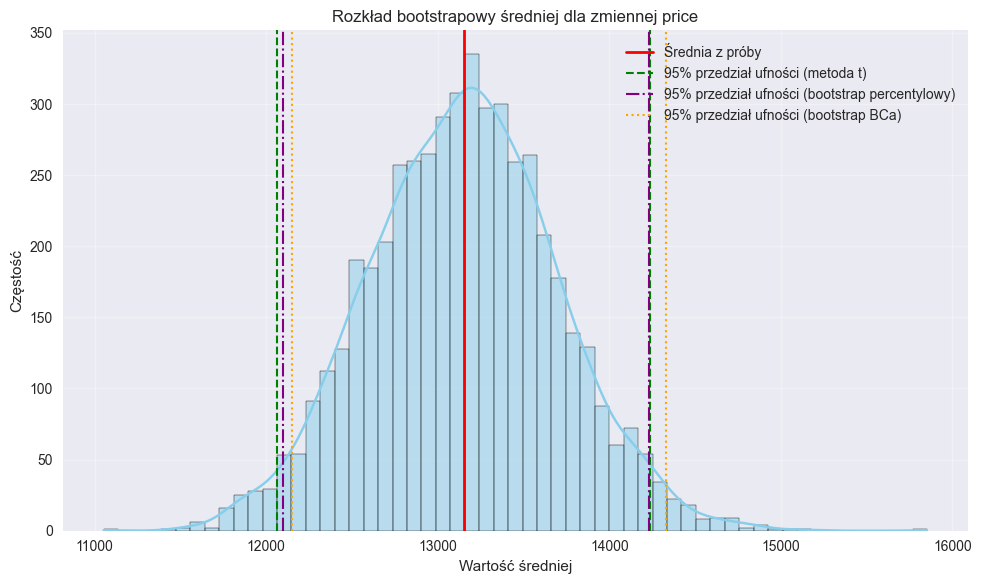

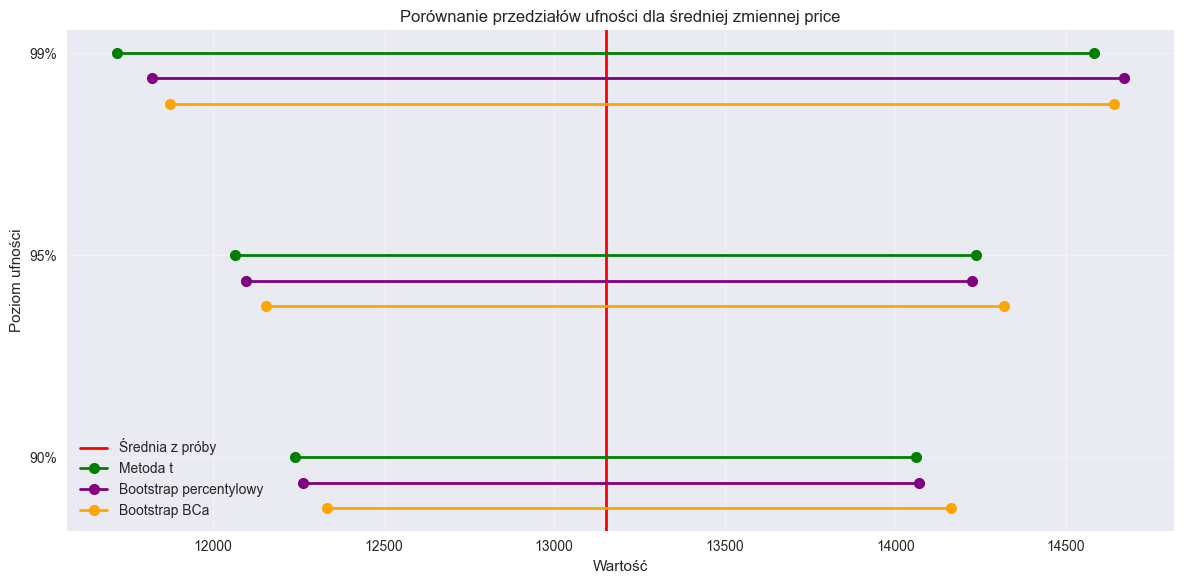


--- Przedziały ufności dla zmiennej 'horsepower' ---
Liczba obserwacji: 205
Średnia: 104.1659
Wariancja: 1562.5998
Odchylenie standardowe: 39.5297

Poziom ufności: 90%
Przedział ufności dla średniej (metoda t): (99.6039, 108.7278)
Przedział ufności dla średniej (bootstrap percentylowy): (99.8039, 108.7073)
Przedział ufności dla średniej (bootstrap BCa): (100.0293, 109.0486)
Przedział ufności dla wariancji: (1337.5616, 1853.8459)
Przedział ufności dla odchylenia standardowego: (36.5727, 43.0563)

Poziom ufności: 95%
Przedział ufności dla średniej (metoda t): (98.7223, 109.6094)
Przedział ufności dla średniej (bootstrap percentylowy): (98.9949, 109.8050)
Przedział ufności dla średniej (bootstrap BCa): (99.1400, 109.8878)
Przedział ufności dla wariancji: (1298.7270, 1916.4057)
Przedział ufności dla odchylenia standardowego: (36.0379, 43.7768)

Poziom ufności: 99%
Przedział ufności dla średniej (metoda t): (96.9872, 111.3445)
Przedział ufności dla średniej (bootstrap percentylowy): (97.21

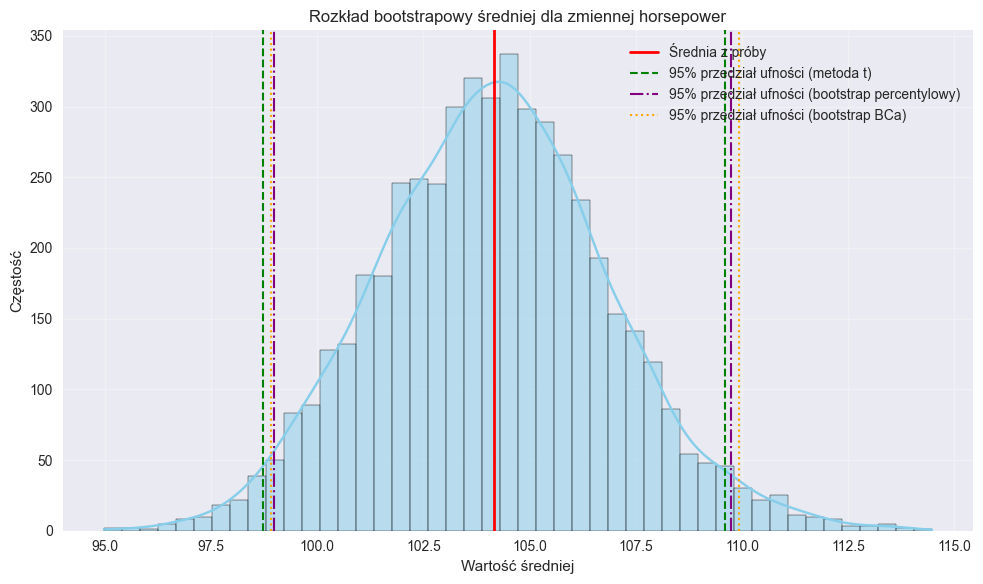

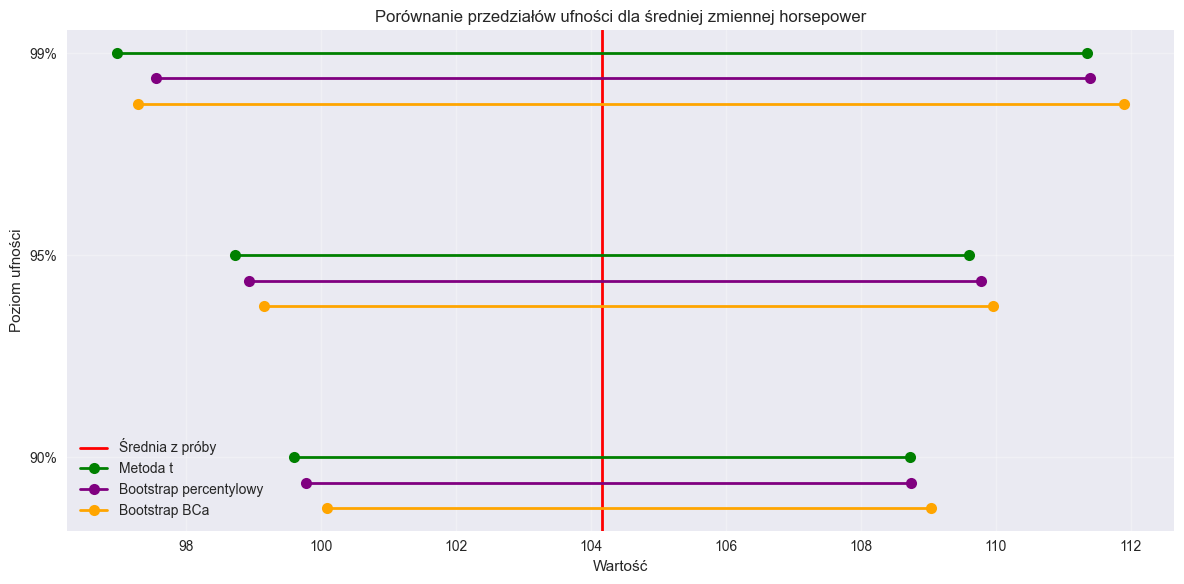


--- Przedziały ufności dla zmiennej 'city-mpg' ---
Liczba obserwacji: 205
Średnia: 25.2195
Wariancja: 42.7996
Odchylenie standardowe: 6.5421

Poziom ufności: 90%
Przedział ufności dla średniej (metoda t): (24.4645, 25.9745)
Przedział ufności dla średniej (bootstrap percentylowy): (24.4732, 25.9902)
Przedział ufności dla średniej (bootstrap BCa): (24.4695, 26.0165)
Przedział ufności dla wariancji: (36.6358, 50.7769)
Przedział ufności dla odchylenia standardowego: (6.0528, 7.1258)

Poziom ufności: 95%
Przedział ufności dla średniej (metoda t): (24.3186, 26.1204)
Przedział ufności dla średniej (bootstrap percentylowy): (24.3463, 26.1172)
Przedział ufności dla średniej (bootstrap BCa): (24.3220, 26.1268)
Przedział ufności dla wariancji: (35.5721, 52.4904)
Przedział ufności dla odchylenia standardowego: (5.9642, 7.2450)

Poziom ufności: 99%
Przedział ufności dla średniej (metoda t): (24.0314, 26.4076)
Przedział ufności dla średniej (bootstrap percentylowy): (24.0536, 26.3952)
Przedział ufn

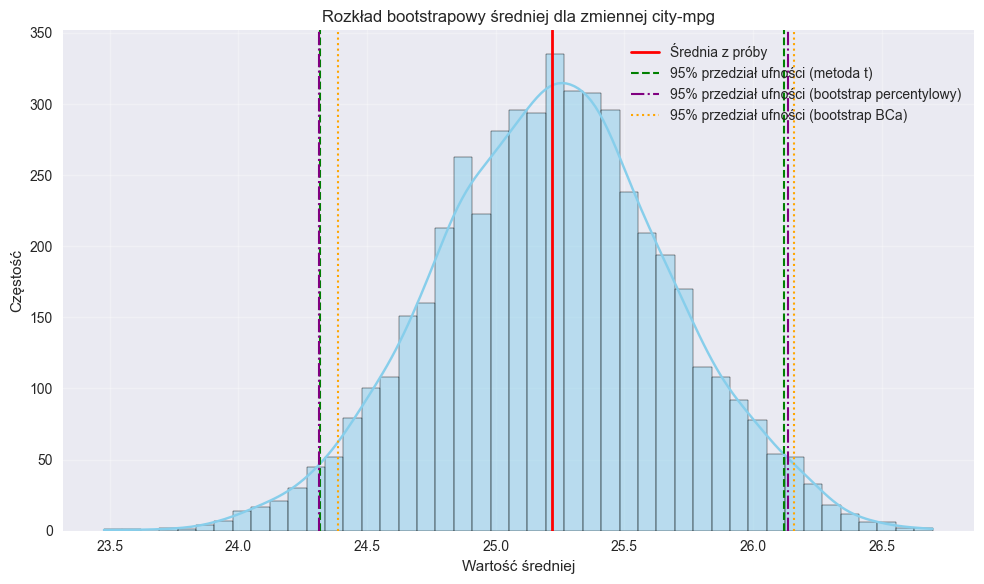

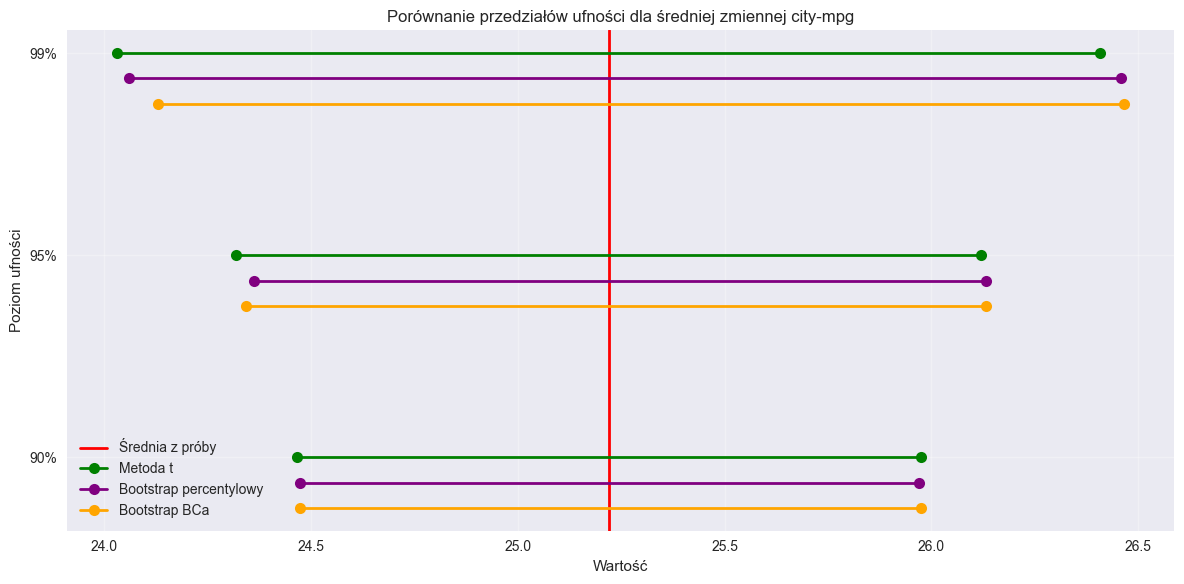


--- Przedziały ufności dla zmiennej 'highway-mpg' ---
Liczba obserwacji: 205
Średnia: 30.7512
Wariancja: 47.4231
Odchylenie standardowe: 6.8864

Poziom ufności: 90%
Przedział ufności dla średniej (metoda t): (29.9565, 31.5460)
Przedział ufności dla średniej (bootstrap percentylowy): (29.9659, 31.5707)
Przedział ufności dla średniej (bootstrap BCa): (29.9682, 31.5659)
Przedział ufności dla wariancji: (40.5934, 56.2621)
Przedział ufności dla odchylenia standardowego: (6.3713, 7.5008)

Poziom ufności: 95%
Przedział ufności dla średniej (metoda t): (29.8029, 31.6995)
Przedział ufności dla średniej (bootstrap percentylowy): (29.8096, 31.6683)
Przedział ufności dla średniej (bootstrap BCa): (29.8061, 31.7366)
Przedział ufności dla wariancji: (39.4149, 58.1607)
Przedział ufności dla odchylenia standardowego: (6.2781, 7.6263)

Poziom ufności: 99%
Przedział ufności dla średniej (metoda t): (29.5006, 32.0018)
Przedział ufności dla średniej (bootstrap percentylowy): (29.5365, 32.0440)
Przedział 

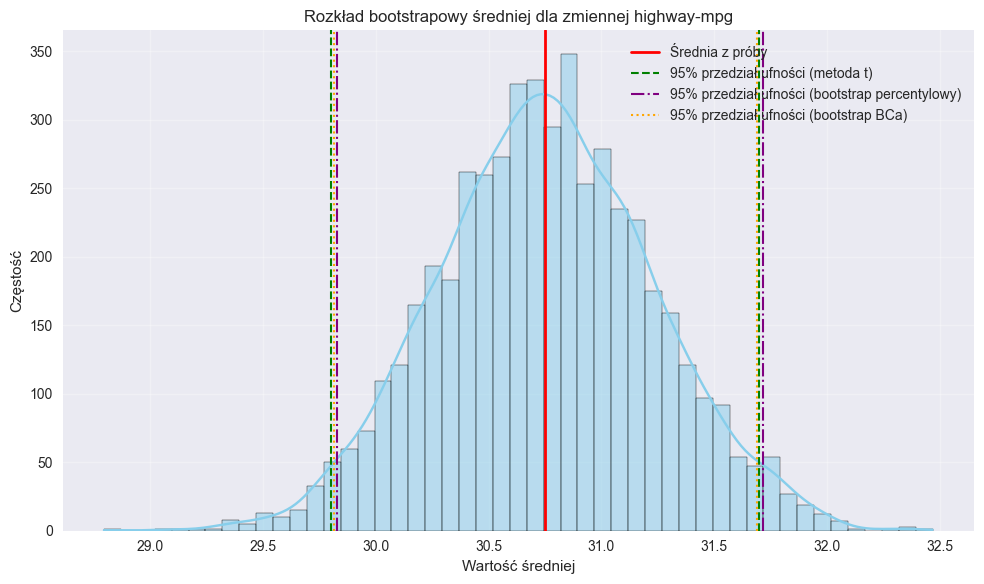

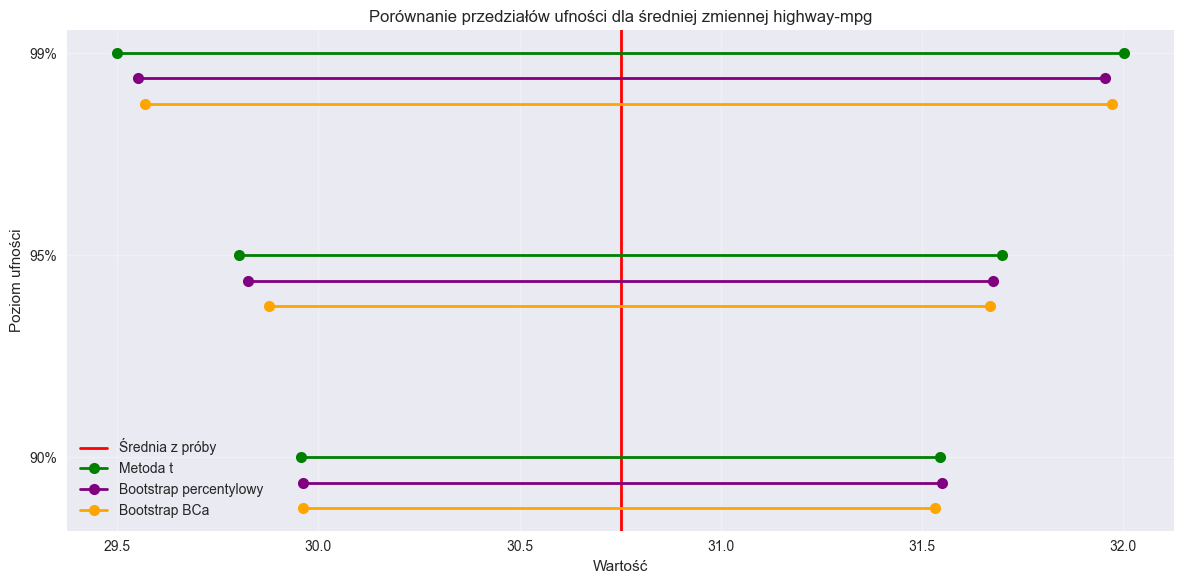


--- Przedziały ufności dla zmiennej 'curb-weight' ---
Liczba obserwacji: 205
Średnia: 2555.5659
Wariancja: 271107.8743
Odchylenie standardowe: 520.6802

Poziom ufności: 90%
Przedział ufności dla średniej (metoda t): (2495.4764, 2615.6553)
Przedział ufności dla średniej (bootstrap percentylowy): (2495.7820, 2615.6010)
Przedział ufności dla średniej (bootstrap BCa): (2495.5512, 2614.3945)
Przedział ufności dla wariancji: (232064.2000, 321638.4799)
Przedział ufności dla odchylenia standardowego: (481.7304, 567.1318)

Poziom ufności: 95%
Przedział ufności dla średniej (metoda t): (2483.8647, 2627.2670)
Przedział ufności dla średniej (bootstrap percentylowy): (2485.0960, 2626.9039)
Przedział ufności dla średniej (bootstrap BCa): (2486.8284, 2628.1516)
Przedział ufności dla wariancji: (225326.4895, 332492.4706)
Przedział ufności dla odchylenia standardowego: (474.6857, 576.6216)

Poziom ufności: 99%
Przedział ufności dla średniej (metoda t): (2461.0093, 2650.1224)
Przedział ufności dla śred

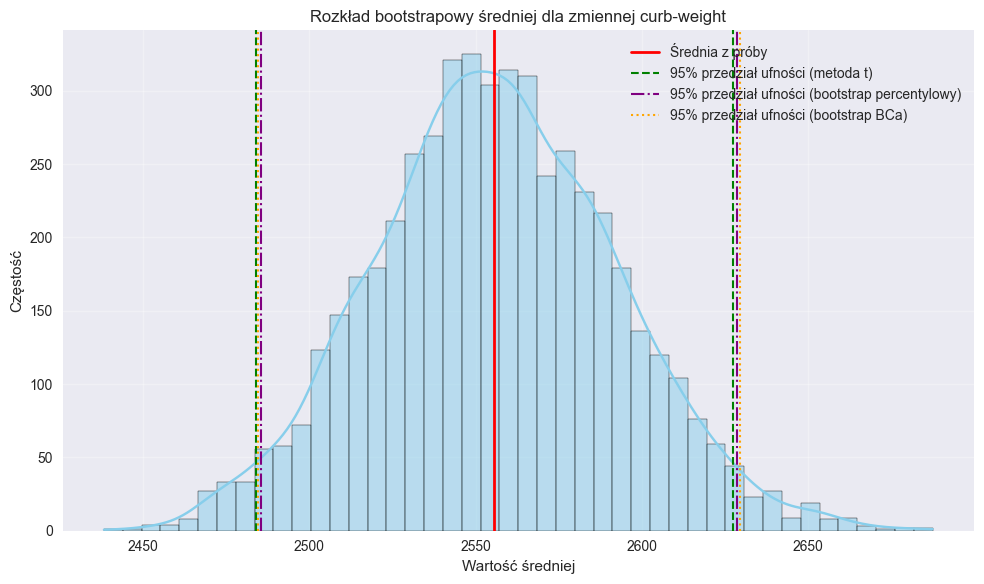

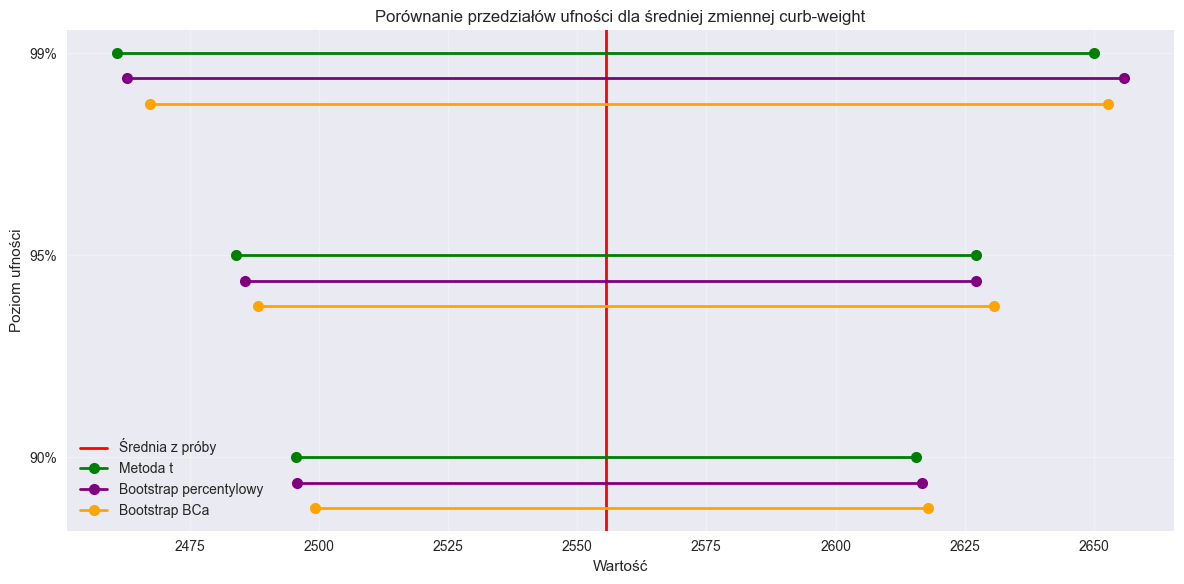


--- Przedziały ufności dla zmiennej 'engine-size' ---
Liczba obserwacji: 205
Średnia: 126.9073
Wariancja: 1734.1139
Odchylenie standardowe: 41.6427

Poziom ufności: 90%
Przedział ufności dla średniej (metoda t): (122.1015, 131.7131)
Przedział ufności dla średniej (bootstrap percentylowy): (122.2434, 131.9122)
Przedział ufności dla średniej (bootstrap BCa): (122.6869, 132.0241)
Przedział ufności dla wariancji: (1484.3750, 2057.3278)
Przedział ufności dla odchylenia standardowego: (38.5276, 45.3578)

Poziom ufności: 95%
Przedział ufności dla średniej (metoda t): (121.1728, 132.6418)
Przedział ufności dla średniej (bootstrap percentylowy): (121.4583, 132.8489)
Przedział ufności dla średniej (bootstrap BCa): (121.5707, 133.2726)
Przedział ufności dla wariancji: (1441.2779, 2126.7542)
Przedział ufności dla odchylenia standardowego: (37.9642, 46.1167)

Poziom ufności: 99%
Przedział ufności dla średniej (metoda t): (119.3449, 134.4697)
Przedział ufności dla średniej (bootstrap percentylowy):

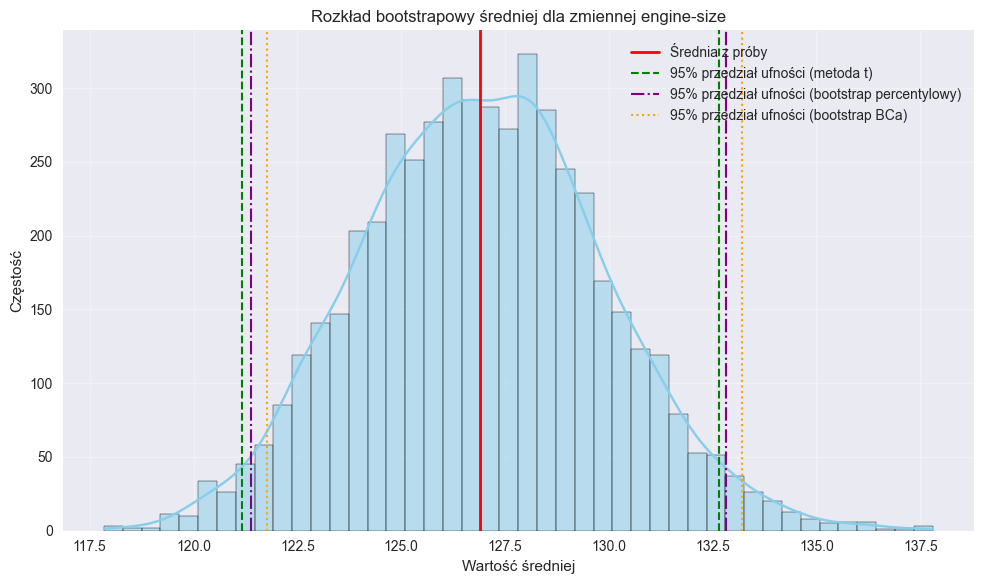

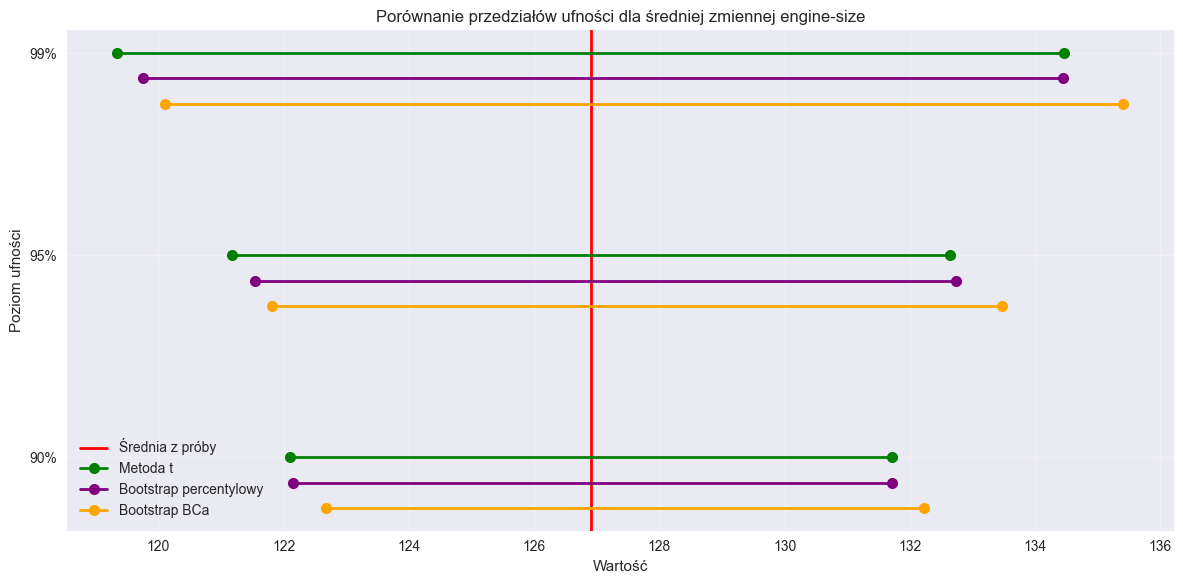

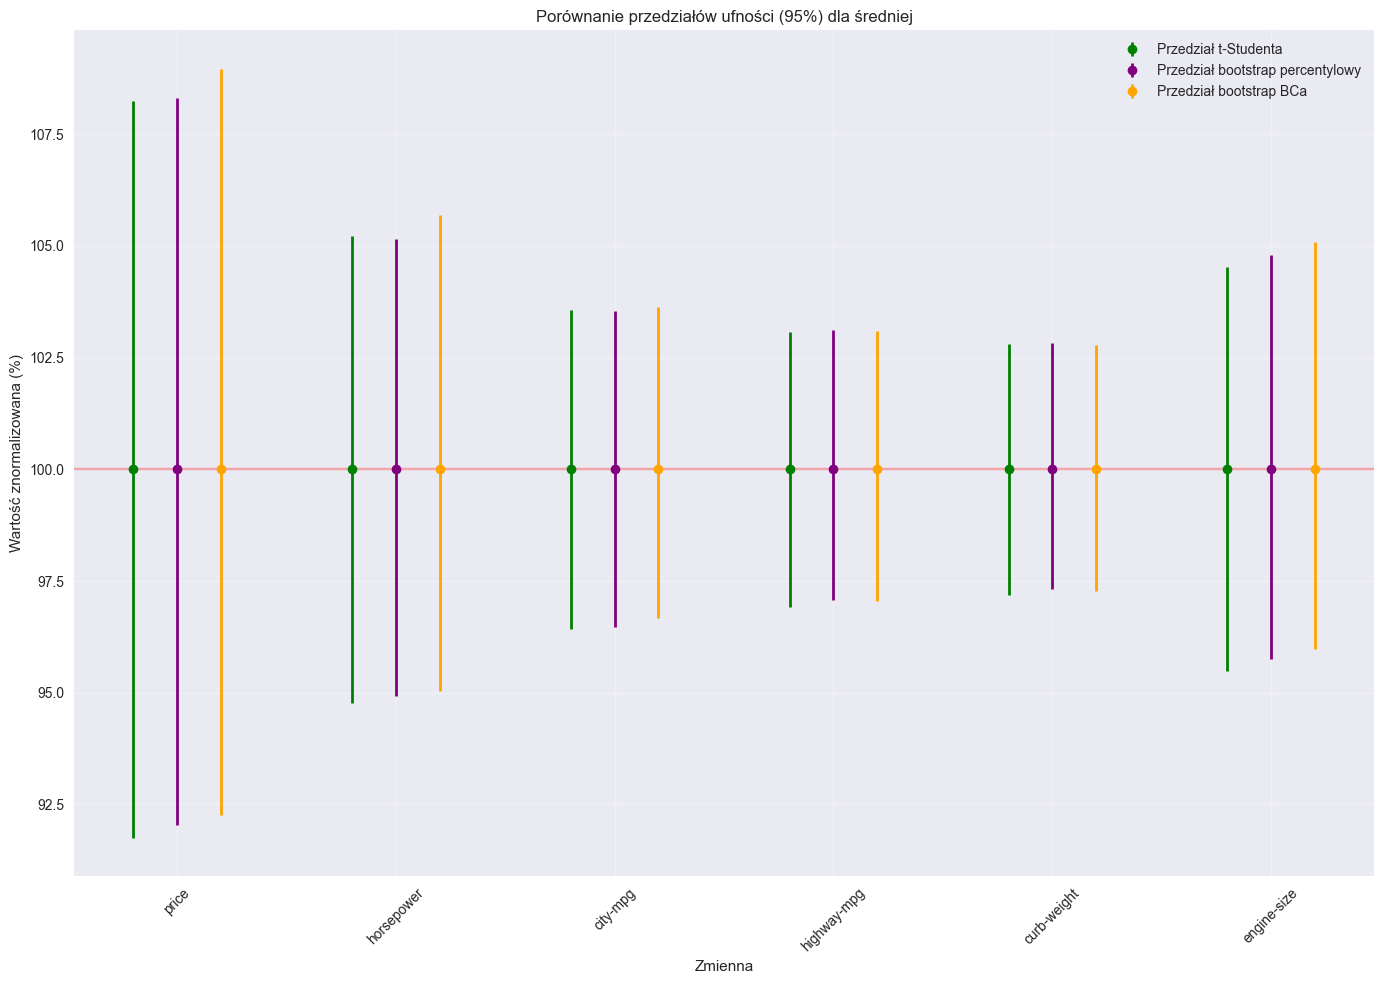

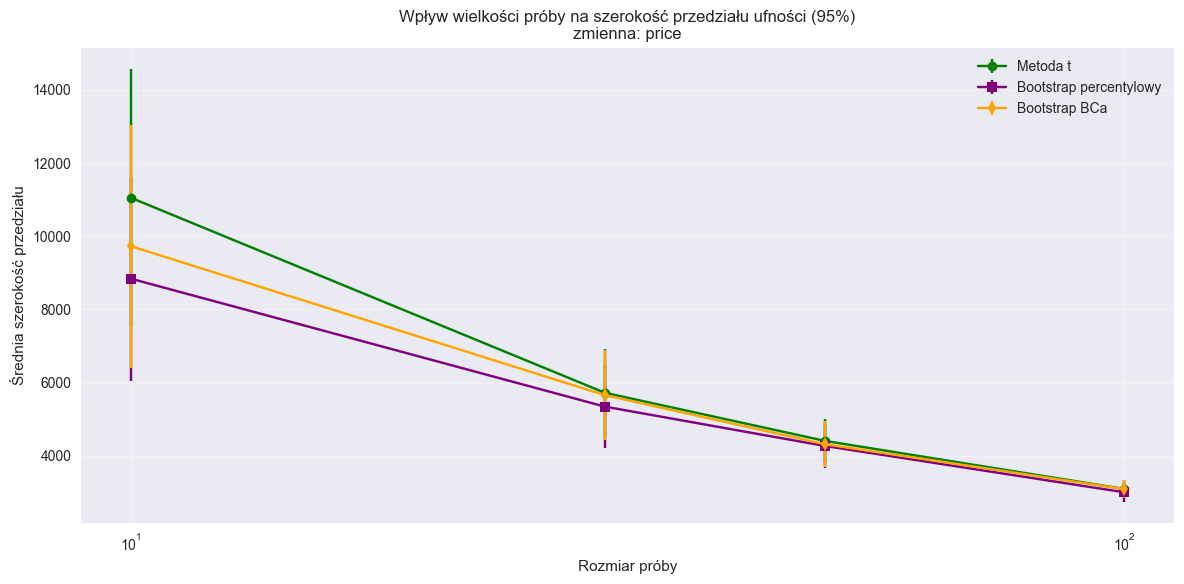


Wpływ wielkości próby na szerokość przedziału ufności - zmienna price:
   sample_size  t_width_mean  t_width_std  bootstrap_width_mean  \
0           10    11052.6649    3506.5321             8841.1592   
1           30     5723.9696    1202.5227             5345.7147   
2           50     4407.4658     599.2351             4269.0894   
3          100     3094.7757     239.7670             3004.3083   

   bootstrap_width_std  bca_width_mean  bca_width_std  
0            2789.8054       9729.7585      3316.2426  
1            1140.9295       5659.4786      1228.5392  
2             587.4895       4316.7539       632.4002  
3             257.3102       3090.4070       252.2347  


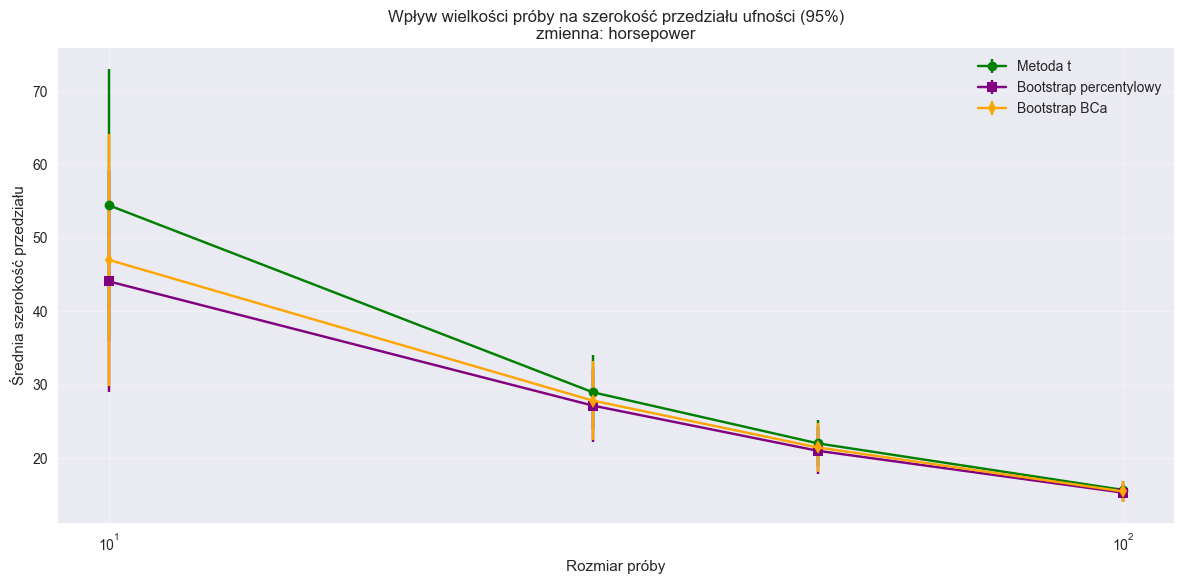


Wpływ wielkości próby na szerokość przedziału ufności - zmienna horsepower:
   sample_size  t_width_mean  t_width_std  bootstrap_width_mean  \
0           10       54.4531      18.5005               44.0823   
1           30       28.9722       5.1333               27.1543   
2           50       22.0024       3.2250               20.9916   
3          100       15.6535       1.2252               15.2865   

   bootstrap_width_std  bca_width_mean  bca_width_std  
0              15.1033         47.0132        17.1628  
1               4.9401         27.8314         5.3445  
2               3.1849         21.4435         3.2786  
3               1.2206         15.4528         1.4004  


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

def mean_confidence_interval_z(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    z_critical = stats.norm.ppf((1 + confidence) / 2)
    margin_of_error = z_critical * std_err
    return (mean - margin_of_error, mean + margin_of_error)

def mean_confidence_interval_t(data, confidence=0.95):
    n = len(data)
    mean = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(n)
    t_critical = stats.t.ppf((1 + confidence) / 2, n-1)
    margin_of_error = t_critical * std_err
    return (mean - margin_of_error, mean + margin_of_error)

def variance_confidence_interval(data, confidence=0.95):
    n = len(data)
    var = np.var(data, ddof=1)
    chi2_lower = stats.chi2.ppf((1 - confidence) / 2, n-1)
    chi2_upper = stats.chi2.ppf((1 + confidence) / 2, n-1)
    var_lower = (n-1) * var / chi2_upper
    var_upper = (n-1) * var / chi2_lower
    return (var_lower, var_upper)

def std_confidence_interval(data, confidence=0.95):
    var_interval = variance_confidence_interval(data, confidence)
    return (np.sqrt(var_interval[0]), np.sqrt(var_interval[1]))

def bootstrap_confidence_interval(data, n_bootstrap=5000, confidence=0.95):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = resample(data, replace=True, n_samples=len(data))
        bootstrap_means.append(np.mean(bootstrap_sample))
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    return np.percentile(bootstrap_means, [lower_percentile, upper_percentile])

def bootstrap_bca_interval(data, statistic=np.mean, n_bootstrap=5000, confidence=0.95):
    theta_hat = statistic(data)
    bootstrap_replicates = []
    for _ in range(n_bootstrap):
        bootstrap_sample = resample(data, replace=True, n_samples=len(data))
        bootstrap_replicates.append(statistic(bootstrap_sample))
    
    prop_less_than_theta_hat = np.mean([1 if t < theta_hat else 0 for t in bootstrap_replicates])
    z0 = stats.norm.ppf(prop_less_than_theta_hat)
    
    jackknife_replicates = []
    for i in range(len(data)):
        jack_sample = np.delete(data, i)
        jackknife_replicates.append(statistic(jack_sample))
    
    jack_mean = np.mean(jackknife_replicates)
    num = np.sum([(jack_mean - jt)**3 for jt in jackknife_replicates])
    den = 6.0 * np.sum([(jack_mean - jt)**2 for jt in jackknife_replicates])**1.5
    
    if abs(den) < 1e-10:
        a = 0
    else:
        a = num / den
    
    alpha = (1 - confidence) / 2
    z_alpha = stats.norm.ppf(alpha)
    z_1_minus_alpha = stats.norm.ppf(1 - alpha)
    
    p_lower = stats.norm.cdf(z0 + (z0 + z_alpha) / (1 - a * (z0 + z_alpha)))
    p_upper = stats.norm.cdf(z0 + (z0 + z_1_minus_alpha) / (1 - a * (z0 + z_1_minus_alpha)))
    
    lower_percentile = 100 * p_lower
    upper_percentile = 100 * p_upper
    
    return np.percentile(bootstrap_replicates, [lower_percentile, upper_percentile])

def visualize_bootstrap_distribution(data, var_name, n_bootstrap=5000, confidence=0.95):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        bootstrap_sample = resample(data, replace=True, n_samples=len(data))
        bootstrap_means.append(np.mean(bootstrap_sample))
    
    t_interval = mean_confidence_interval_t(data, confidence)
    percentile_interval = np.percentile(bootstrap_means, 
                                        [(1 - confidence) / 2 * 100, 
                                         (1 + confidence) / 2 * 100])
    bca_interval = bootstrap_bca_interval(data, np.mean, n_bootstrap, confidence)
    
    plt.figure(figsize=(10, 6))
    sns.histplot(bootstrap_means, kde=True, color='skyblue')
    plt.axvline(np.mean(data), color='red', linestyle='-', linewidth=2, label='Średnia z próby')
    plt.axvline(t_interval[0], color='green', linestyle='--', linewidth=1.5, 
                label=f'{confidence*100:.0f}% przedział ufności (metoda t)')
    plt.axvline(t_interval[1], color='green', linestyle='--', linewidth=1.5)
    plt.axvline(percentile_interval[0], color='purple', linestyle='-.', linewidth=1.5, 
                label=f'{confidence*100:.0f}% przedział ufności (bootstrap percentylowy)')
    plt.axvline(percentile_interval[1], color='purple', linestyle='-.', linewidth=1.5)
    plt.axvline(bca_interval[0], color='orange', linestyle=':', linewidth=1.5, 
                label=f'{confidence*100:.0f}% przedział ufności (bootstrap BCa)')
    plt.axvline(bca_interval[1], color='orange', linestyle=':', linewidth=1.5)
    plt.title(f'Rozkład bootstrapowy średniej dla zmiennej {var_name}')
    plt.xlabel('Wartość średniej')
    plt.ylabel('Częstość')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def compare_confidence_levels(data, var_name, confidence_levels=[0.90, 0.95, 0.99]):
    intervals_t = []
    intervals_bootstrap = []
    intervals_bootstrap_bca = []
    
    for conf in confidence_levels:
        intervals_t.append(mean_confidence_interval_t(data, conf))
        intervals_bootstrap.append(bootstrap_confidence_interval(data, 5000, conf))
        intervals_bootstrap_bca.append(bootstrap_bca_interval(data, np.mean, 5000, conf))
    
    plt.figure(figsize=(12, 6))
    y_positions = np.arange(len(confidence_levels)) * 0.8
    y_labels = [f"{conf*100:.0f}%" for conf in confidence_levels]
    mean_value = np.mean(data)
    plt.axvline(mean_value, color='red', linestyle='-', linewidth=2, label='Średnia z próby')
    
    for i, conf in enumerate(confidence_levels):
        plt.plot([intervals_t[i][0], intervals_t[i][1]], [y_positions[i], y_positions[i]], 
                 'o-', color='green', linewidth=2, markersize=8, 
                 label='Metoda t' if i == 0 else "")
        
        plt.plot([intervals_bootstrap[i][0], intervals_bootstrap[i][1]], 
                 [y_positions[i]-0.1, y_positions[i]-0.1], 'o-', color='purple', linewidth=2, 
                 markersize=8, label='Bootstrap percentylowy' if i == 0 else "")
        
        plt.plot([intervals_bootstrap_bca[i][0], intervals_bootstrap_bca[i][1]], 
                 [y_positions[i]-0.2, y_positions[i]-0.2], 'o-', color='orange', linewidth=2, 
                 markersize=8, label='Bootstrap BCa' if i == 0 else "")
    
    plt.yticks(y_positions, y_labels)
    plt.title(f'Porównanie przedziałów ufności dla średniej zmiennej {var_name}')
    plt.xlabel('Wartość')
    plt.ylabel('Poziom ufności')
    plt.legend(loc='best')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def create_confidence_intervals_table(df, variables, confidence=0.95):
    results = []
    
    for var in variables:
        data = df[var].values
        mean = np.mean(data)
        var_val = np.var(data, ddof=1)
        std = np.std(data, ddof=1)
        
        t_interval = mean_confidence_interval_t(data, confidence)
        bootstrap_interval = bootstrap_confidence_interval(data, 5000, confidence)
        bca_interval = bootstrap_bca_interval(data, np.mean, 5000, confidence)  # Zmieniona nazwa zmiennej
        var_interval = variance_confidence_interval(data, confidence)
        std_interval = std_confidence_interval(data, confidence)
        
        result = {
            'Zmienna': var,
            'Średnia': mean,
            'CI_t_dolny': t_interval[0],
            'CI_t_górny': t_interval[1],
            'CI_bootstrap_dolny': bootstrap_interval[0],
            'CI_bootstrap_górny': bootstrap_interval[1],
            'CI_bootstrap_bca_dolny': bca_interval[0],  # Używamy nowej nazwy
            'CI_bootstrap_bca_górny': bca_interval[1],  # Używamy nowej nazwy
            'Wariancja': var_val,
            'CI_var_dolny': var_interval[0],
            'CI_var_górny': var_interval[1],
            'Odchylenie standardowe': std,
            'CI_std_dolny': std_interval[0],
            'CI_std_górny': std_interval[1],
        }
        results.append(result)
    
    return pd.DataFrame(results)

def plot_ci_comparison(df, variables, confidence=0.95):
    means = []
    t_intervals = []
    bootstrap_intervals = []
    bootstrap_bca_intervals = []
    
    for var in variables:
        data = df[var].values
        means.append(np.mean(data))
        t_intervals.append(mean_confidence_interval_t(data, confidence))
        bootstrap_intervals.append(bootstrap_confidence_interval(data, 5000, confidence))
        bootstrap_bca_intervals.append(bootstrap_bca_interval(data, np.mean, 3000, confidence))
    
    normalized_means = np.array(means) / np.array(means) * 100
    t_lower = np.array([t[0] for t in t_intervals]) / np.array(means) * 100
    t_upper = np.array([t[1] for t in t_intervals]) / np.array(means) * 100
    bs_lower = np.array([bs[0] for bs in bootstrap_intervals]) / np.array(means) * 100
    bs_upper = np.array([bs[1] for bs in bootstrap_intervals]) / np.array(means) * 100
    bca_lower = np.array([bca[0] for bca in bootstrap_bca_intervals]) / np.array(means) * 100
    bca_upper = np.array([bca[1] for bca in bootstrap_bca_intervals]) / np.array(means) * 100
    
    plt.figure(figsize=(14, 10))
    x = np.arange(len(variables))
    width = 0.2
    
    plt.errorbar(x - width, normalized_means, 
                 yerr=[normalized_means - t_lower, t_upper - normalized_means],
                 fmt='o', color='green', ecolor='green', elinewidth=2, capsize=6,
                 label='Przedział t-Studenta')
    
    plt.errorbar(x, normalized_means, 
                 yerr=[normalized_means - bs_lower, bs_upper - normalized_means],
                 fmt='o', color='purple', ecolor='purple', elinewidth=2, capsize=6,
                 label='Przedział bootstrap percentylowy')
    
    plt.errorbar(x + width, normalized_means, 
                 yerr=[normalized_means - bca_lower, bca_upper - normalized_means],
                 fmt='o', color='orange', ecolor='orange', elinewidth=2, capsize=6,
                 label='Przedział bootstrap BCa')
    
    plt.axhline(y=100, color='r', linestyle='-', alpha=0.3)
    plt.xticks(x, variables, rotation=45)
    plt.title(f'Porównanie przedziałów ufności ({confidence*100:.0f}%) dla średniej')
    plt.xlabel('Zmienna')
    plt.ylabel('Wartość znormalizowana (%)')
    plt.legend()
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

def analyze_sample_size_effect(data, var_name, sample_sizes=[10, 30, 50, 100], confidence=0.95, n_simulations=50):
    results = []
    
    for n in sample_sizes:
        t_widths = []
        bootstrap_widths = []
        bca_widths = []
        
        for _ in range(n_simulations):
            if n <= len(data):
                sample = resample(data, replace=False, n_samples=n)
            else:
                sample = resample(data, replace=True, n_samples=n)
            
            t_interval = mean_confidence_interval_t(sample, confidence)
            bootstrap_interval = bootstrap_confidence_interval(sample, 1000, confidence)
            try:
                bca_interval = bootstrap_bca_interval(sample, np.mean, 1000, confidence)
                bca_width = bca_interval[1] - bca_interval[0]
            except:
                bca_width = np.nan
            
            t_width = t_interval[1] - t_interval[0]
            bootstrap_width = bootstrap_interval[1] - bootstrap_interval[0]
            
            t_widths.append(t_width)
            bootstrap_widths.append(bootstrap_width)
            bca_widths.append(bca_width)
        
        results.append({
            'sample_size': n,
            't_width_mean': np.mean(t_widths),
            't_width_std': np.std(t_widths),
            'bootstrap_width_mean': np.mean(bootstrap_widths),
            'bootstrap_width_std': np.std(bootstrap_widths),
            'bca_width_mean': np.nanmean(bca_widths),
            'bca_width_std': np.nanstd(bca_widths)
        })
    
    results_df = pd.DataFrame(results)
    plt.figure(figsize=(12, 6))
    
    plt.errorbar(results_df['sample_size'], results_df['t_width_mean'],
                 yerr=results_df['t_width_std'], fmt='o-', color='green', 
                 label='Metoda t', capsize=5)
    
    plt.errorbar(results_df['sample_size'], results_df['bootstrap_width_mean'],
                 yerr=results_df['bootstrap_width_std'], fmt='s-', color='purple', 
                 label='Bootstrap percentylowy', capsize=5)
    
    plt.errorbar(results_df['sample_size'], results_df['bca_width_mean'],
                 yerr=results_df['bca_width_std'], fmt='d-', color='orange', 
                 label='Bootstrap BCa', capsize=5)
    
    plt.title(f'Wpływ wielkości próby na szerokość przedziału ufności ({confidence*100:.0f}%)\nzmienna: {var_name}')
    plt.xlabel('Rozmiar próby')
    plt.ylabel('Średnia szerokość przedziału')
    plt.xscale('log')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return results_df

confidence_levels = [0.90, 0.95, 0.99]

ci_table = create_confidence_intervals_table(df, selected_variables, 0.95)
print("Tabela porównawcza przedziałów ufności (poziom ufności 95%):")
print(ci_table[['Zmienna', 'Średnia', 'CI_t_dolny', 'CI_t_górny', 
                'CI_bootstrap_dolny', 'CI_bootstrap_górny', 'Wariancja', 
                'CI_var_dolny', 'CI_var_górny']].round(2))

for var in selected_variables:
    data = df[var].values
    n = len(data)
    
    print(f"\n--- Przedziały ufności dla zmiennej '{var}' ---")
    print(f"Liczba obserwacji: {n}")
    print(f"Średnia: {np.mean(data):.4f}")
    print(f"Wariancja: {np.var(data, ddof=1):.4f}")
    print(f"Odchylenie standardowe: {np.std(data, ddof=1):.4f}")
    
    for conf in confidence_levels:
        print(f"\nPoziom ufności: {conf*100:.0f}%")
        
        t_interval = mean_confidence_interval_t(data, conf)
        print(f"Przedział ufności dla średniej (metoda t): ({t_interval[0]:.4f}, {t_interval[1]:.4f})")
        
        bootstrap_interval = bootstrap_confidence_interval(data, 5000, conf)
        print(f"Przedział ufności dla średniej (bootstrap percentylowy): ({bootstrap_interval[0]:.4f}, {bootstrap_interval[1]:.4f})")
        
        bootstrap_bca = bootstrap_bca_interval(data, np.mean, 3000, conf)
        print(f"Przedział ufności dla średniej (bootstrap BCa): ({bootstrap_bca[0]:.4f}, {bootstrap_bca[1]:.4f})")
        
        var_interval = variance_confidence_interval(data, conf)
        print(f"Przedział ufności dla wariancji: ({var_interval[0]:.4f}, {var_interval[1]:.4f})")
        
        std_interval = std_confidence_interval(data, conf)
        print(f"Przedział ufności dla odchylenia standardowego: ({std_interval[0]:.4f}, {std_interval[1]:.4f})")
        
    t_interval = mean_confidence_interval_t(data, 0.95)
    bootstrap_interval = bootstrap_confidence_interval(data, 5000, 0.95)
    bootstrap_bca = bootstrap_bca_interval(data, np.mean, 3000, 0.95)
    
    t_width = t_interval[1] - t_interval[0]
    bootstrap_width = bootstrap_interval[1] - bootstrap_interval[0]
    bca_width = bootstrap_bca[1] - bootstrap_bca[0]
    
    print("\nPorównanie szerokości przedziałów ufności dla średniej (poziom 95%):")
    print(f"Szerokość przedziału (metoda t): {t_width:.4f}")
    print(f"Szerokość przedziału (bootstrap percentylowy): {bootstrap_width:.4f}")
    print(f"Szerokość przedziału (bootstrap BCa): {bca_width:.4f}")
    print(f"Różnica między metodą t a bootstrap percentylowym: {abs(t_width - bootstrap_width):.4f}")
    print(f"Różnica między metodą t a bootstrap BCa: {abs(t_width - bca_width):.4f}")
    
    visualize_bootstrap_distribution(data, var)
    compare_confidence_levels(data, var)

plot_ci_comparison(df, selected_variables, 0.95)

for var in selected_variables[:2]:
    sample_size_results = analyze_sample_size_effect(df[var].values, var)
    print(f"\nWpływ wielkości próby na szerokość przedziału ufności - zmienna {var}:")
    print(sample_size_results.round(4))

4. Różne wykresy (im więcej tym lepiej). Powinny być histogramy, wykresy kwantyl-kwantyl,
boxplot i inne.


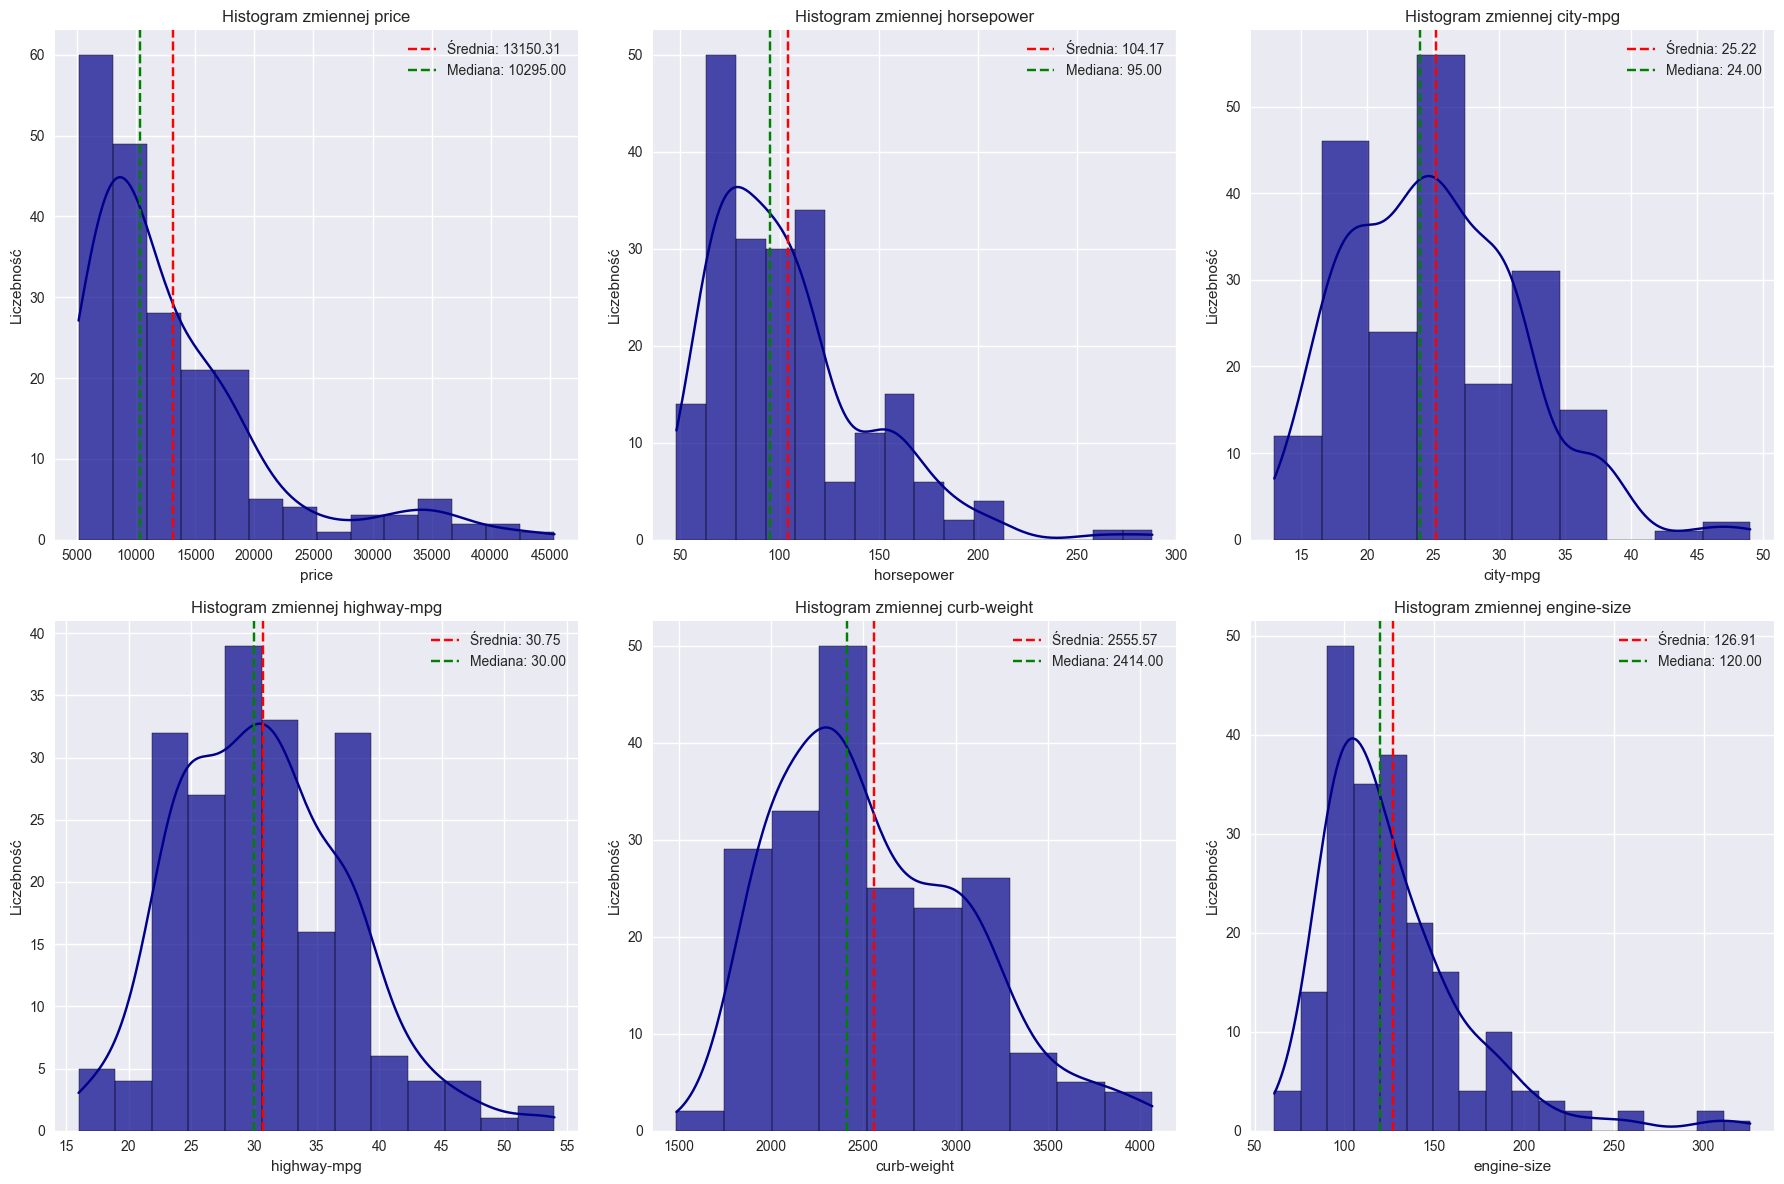

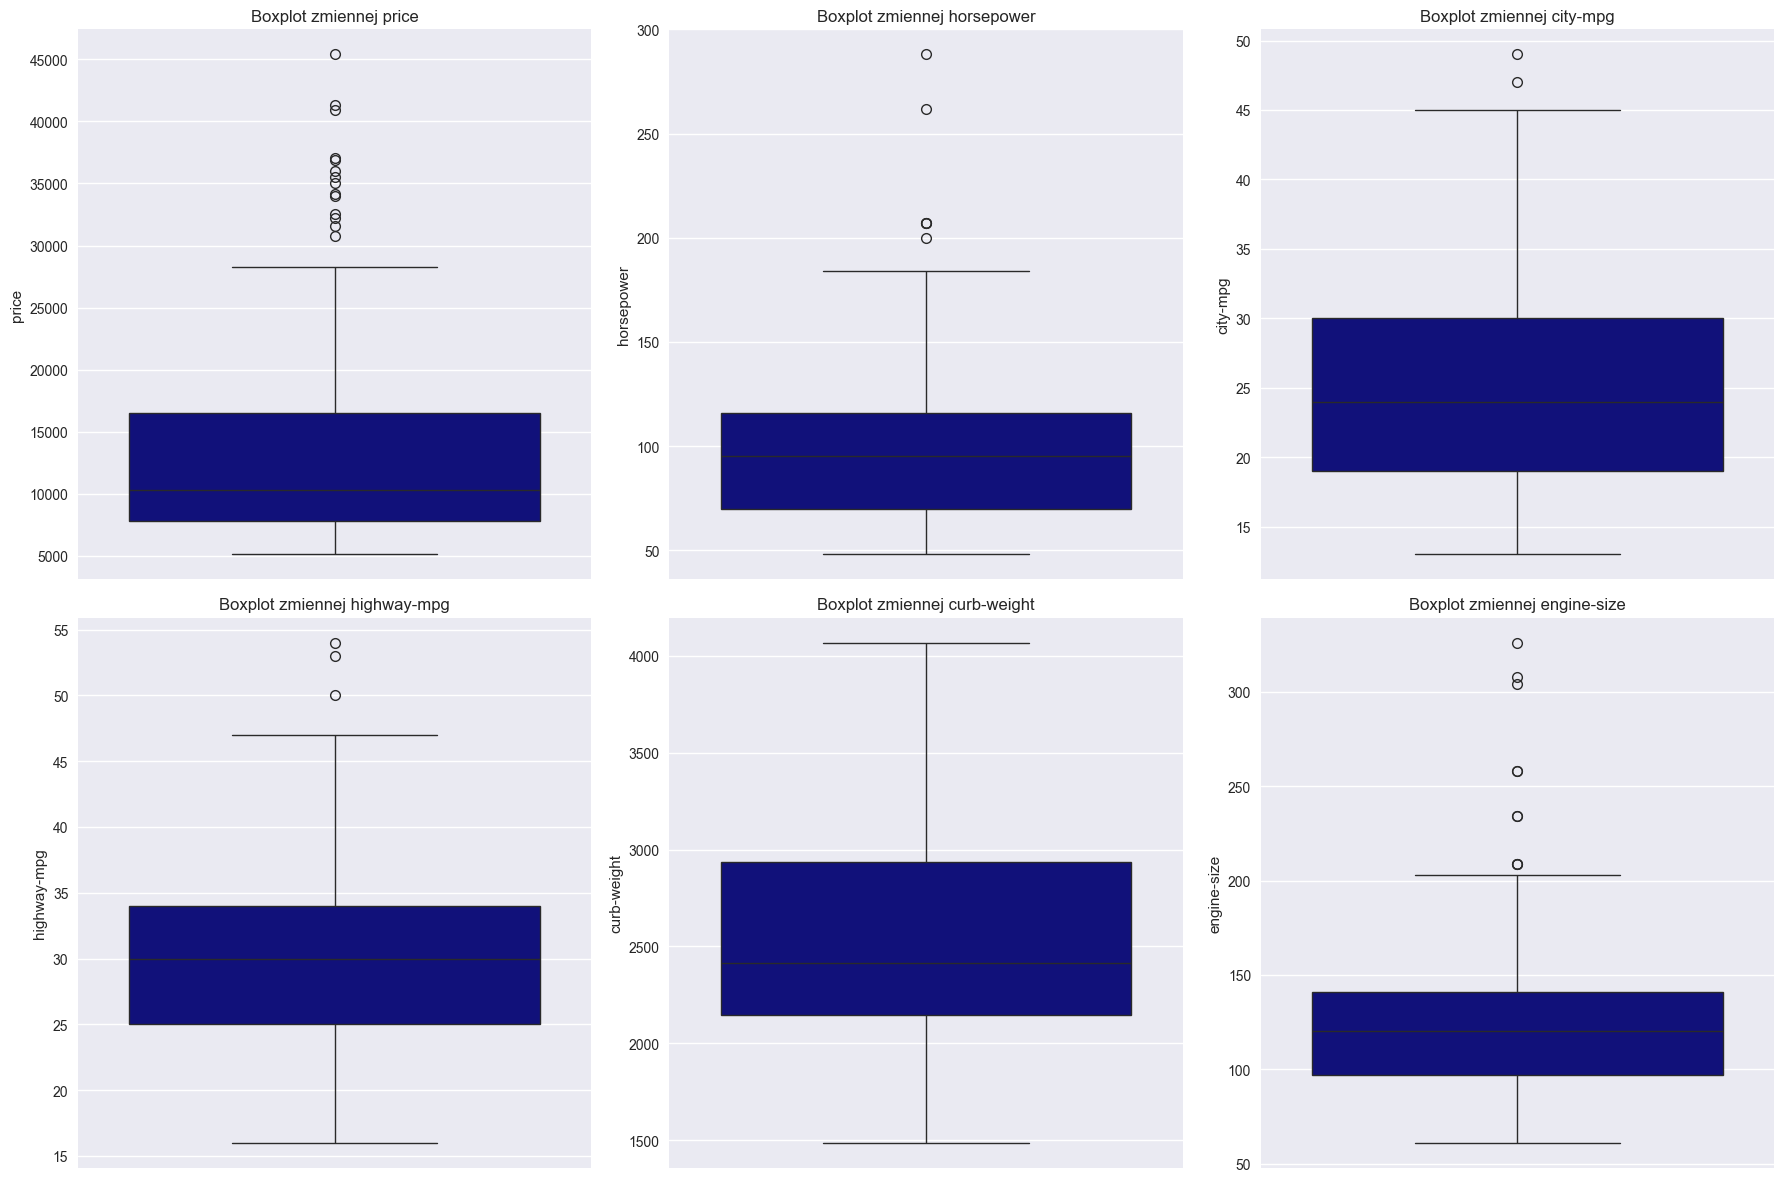

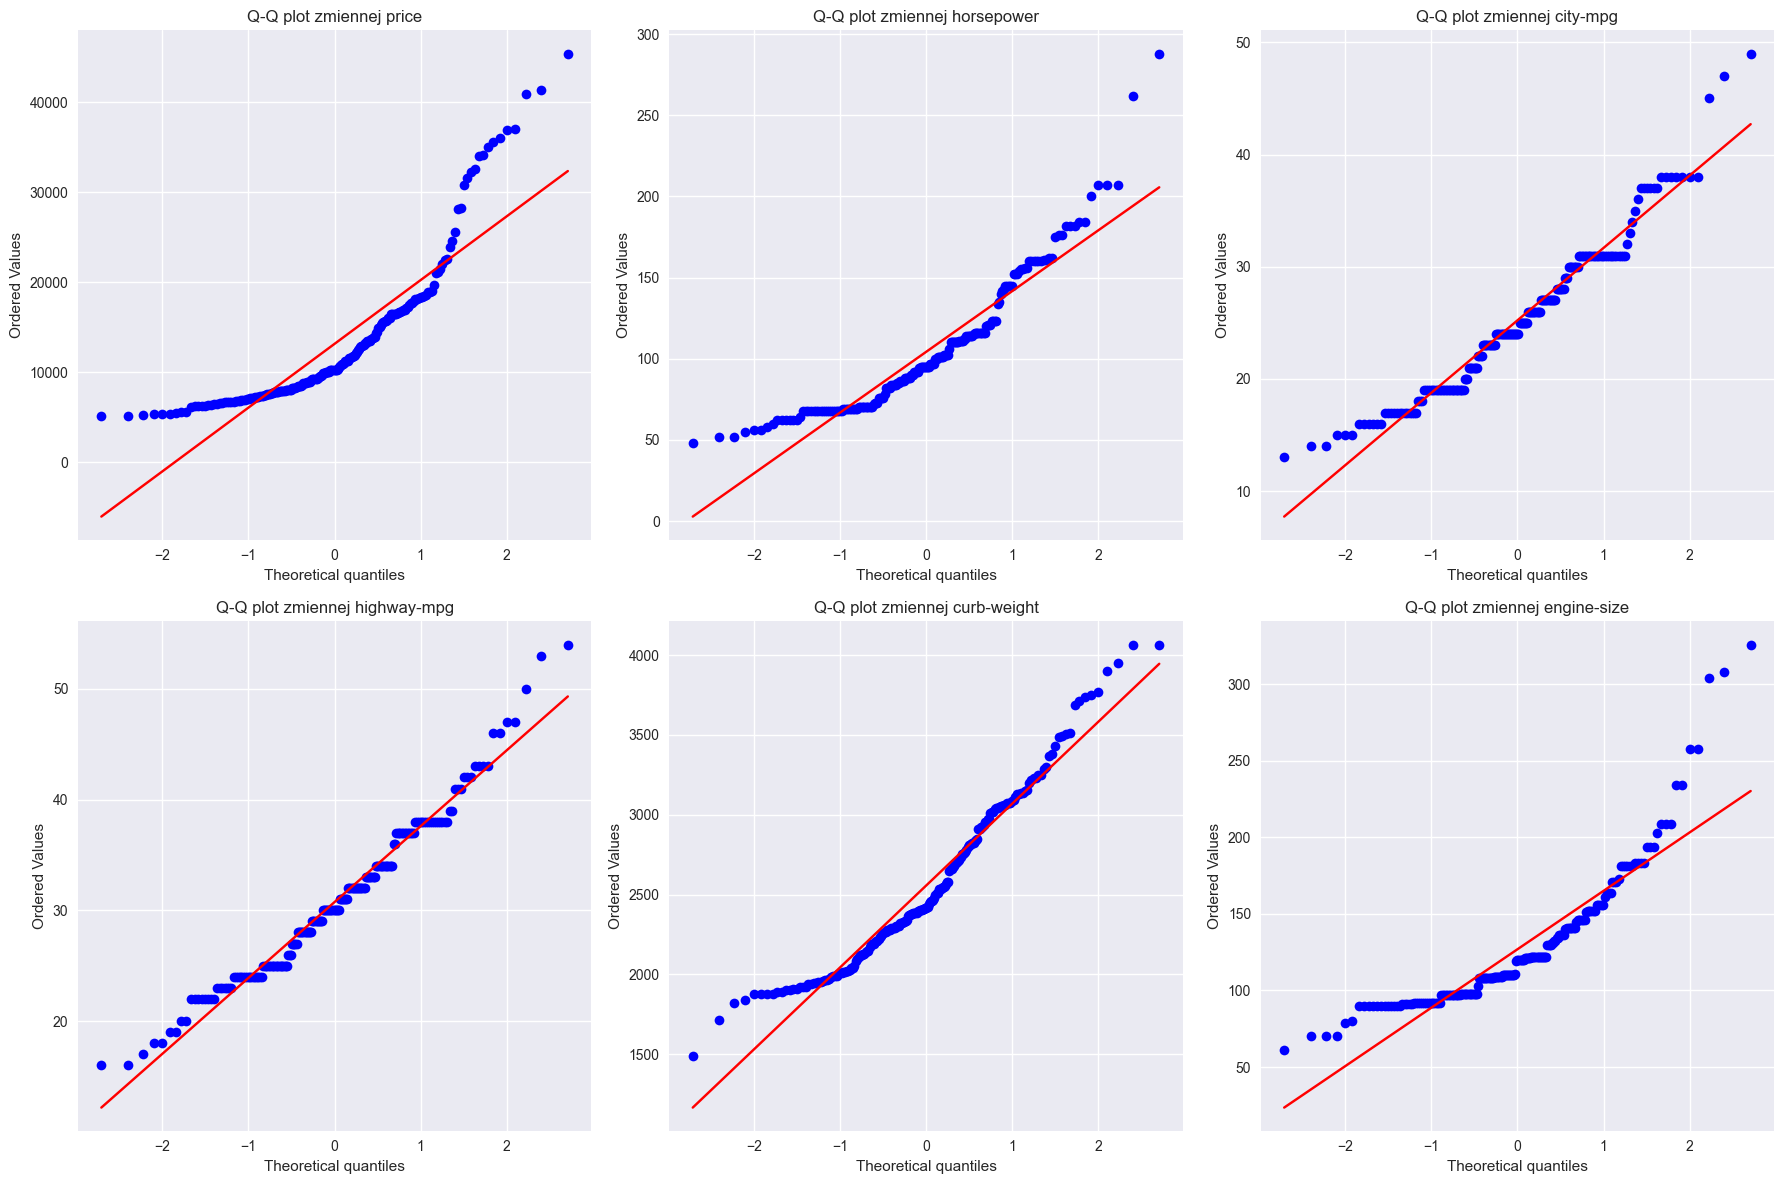

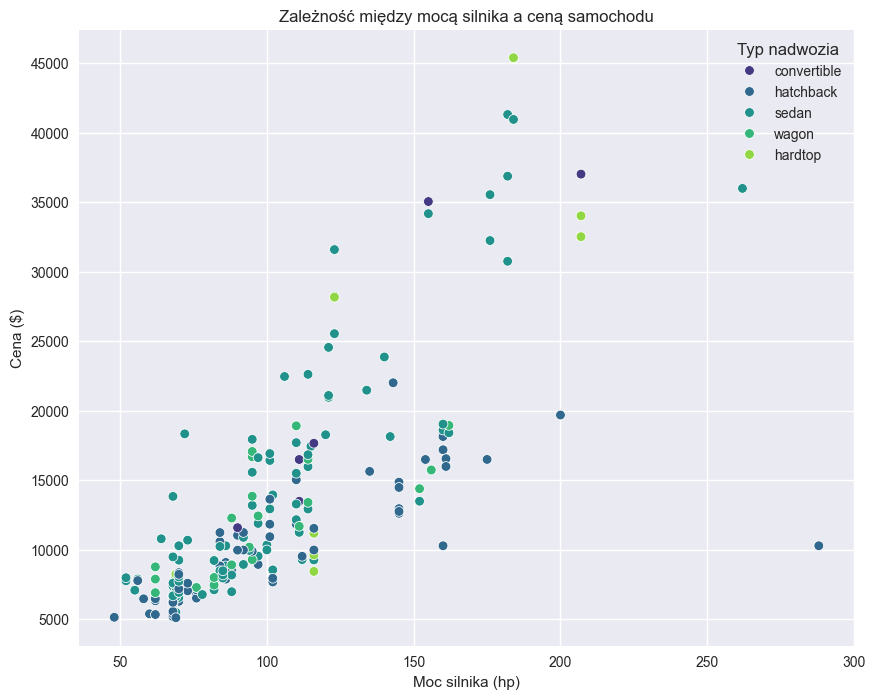

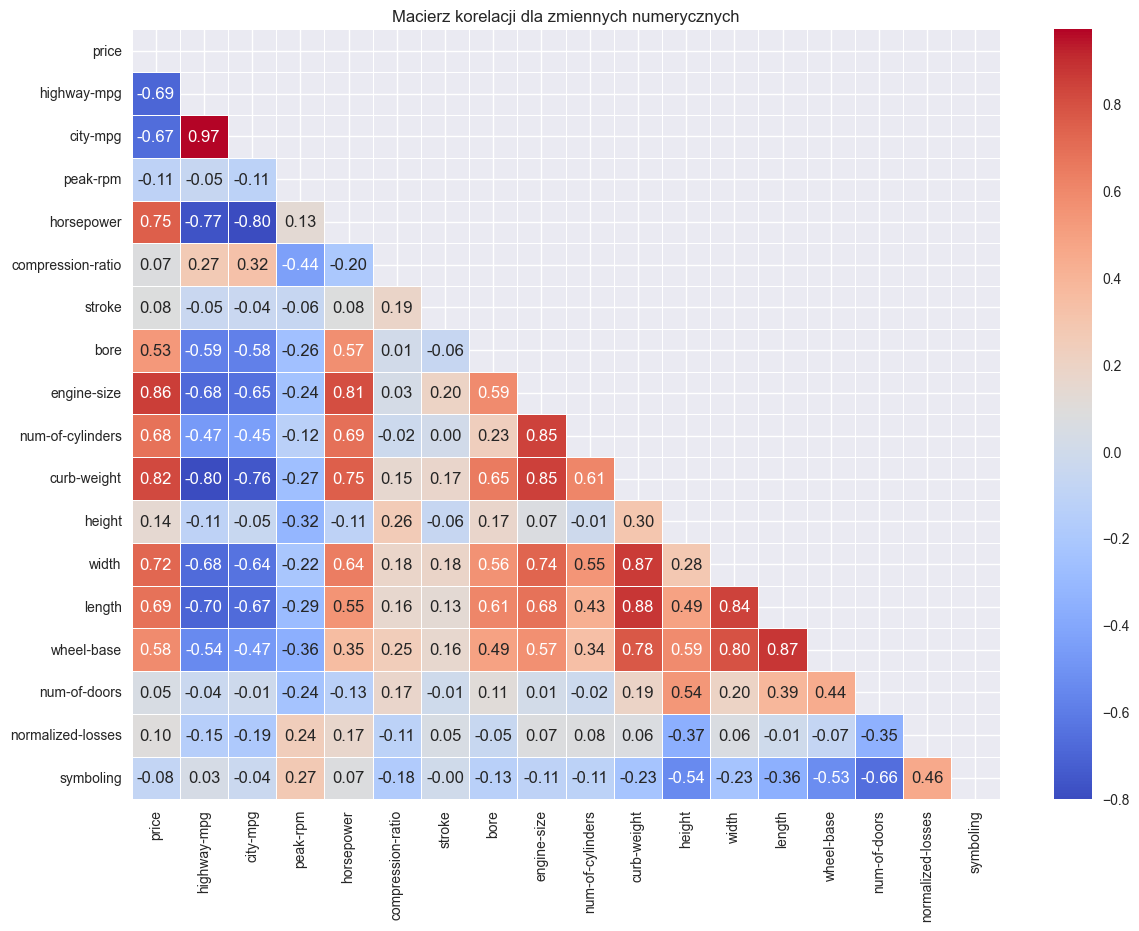

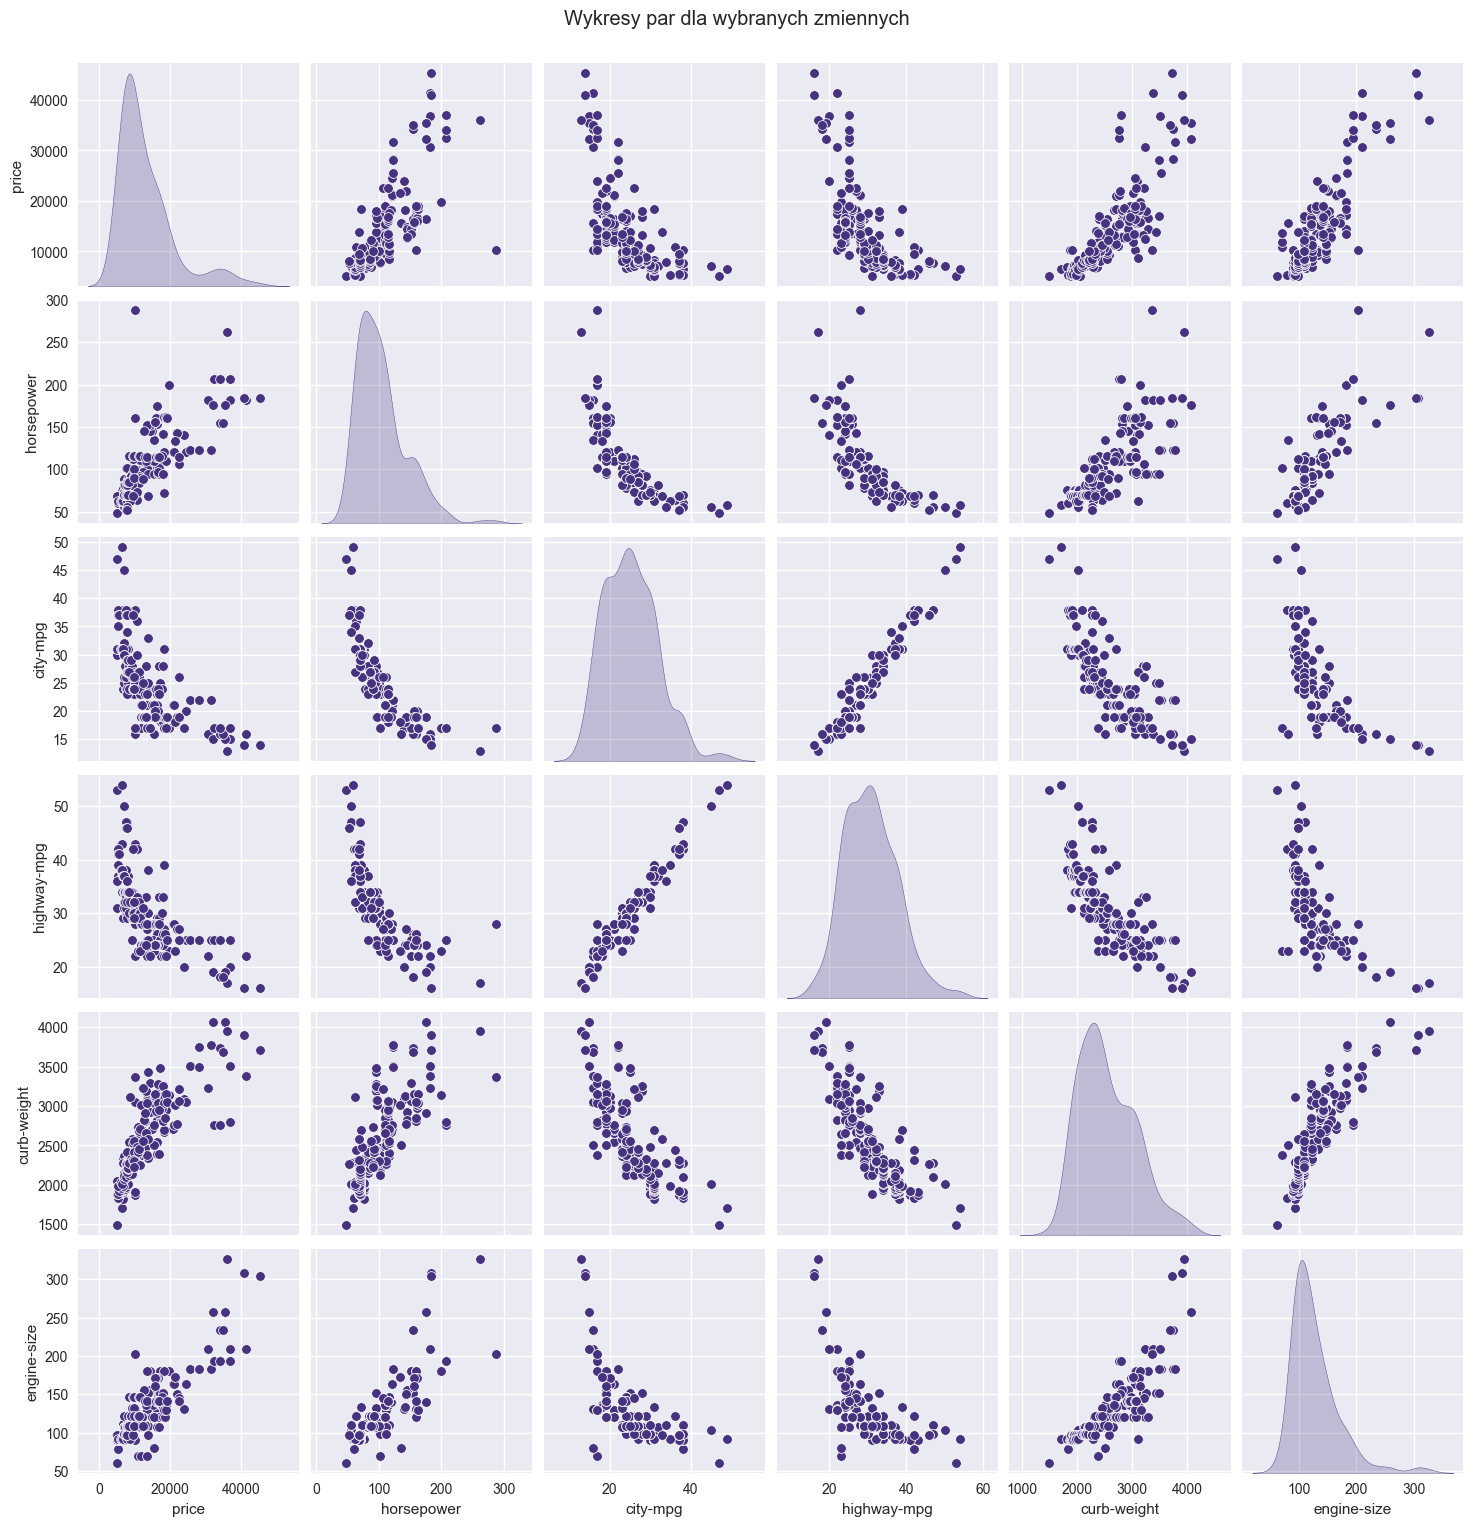

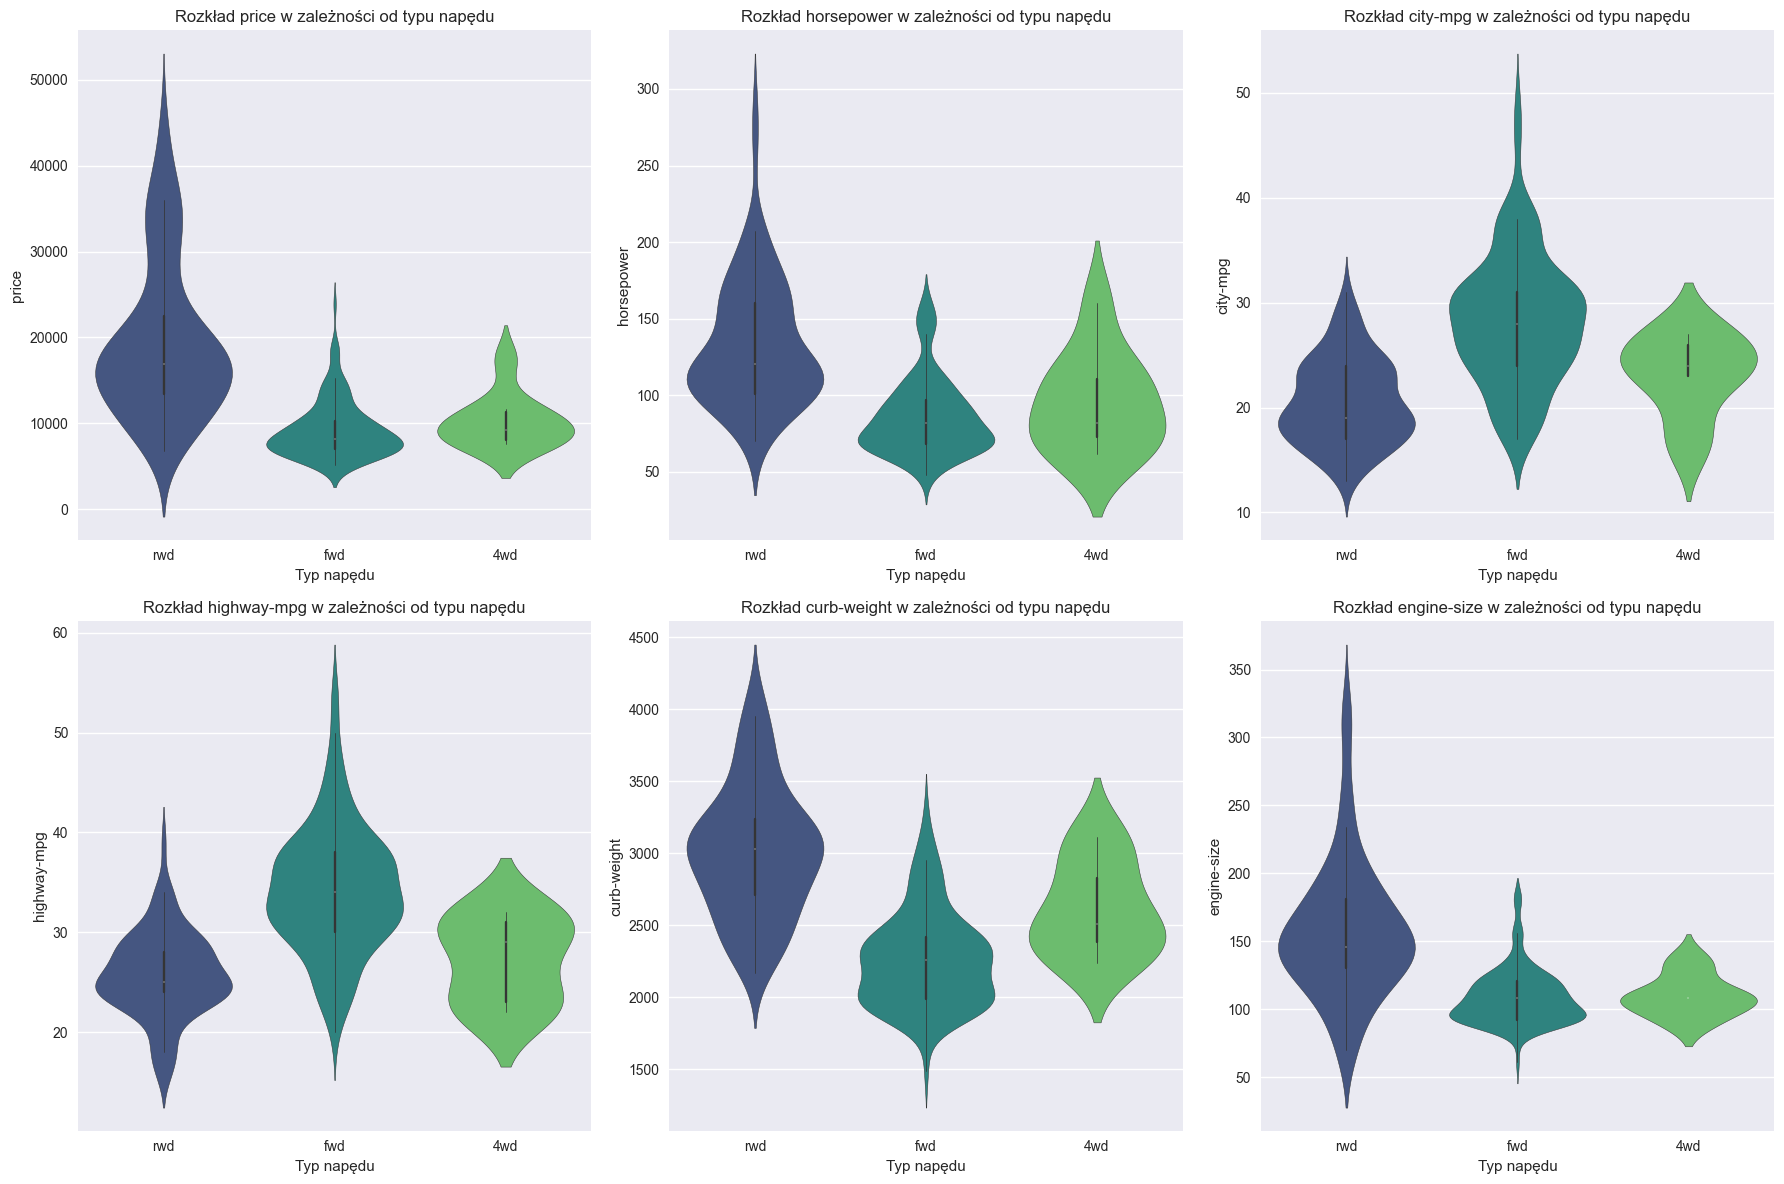

In [11]:
# Histogramy dla wybranych zmiennych
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    sns.histplot(df[var], kde=True, ax=axes[i], color='darkblue', alpha=0.7)
    axes[i].set_title(f'Histogram zmiennej {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Liczebność')
    
    # Dodanie średniej i mediany
    axes[i].axvline(df[var].mean(), color='red', linestyle='--', label=f'Średnia: {df[var].mean():.2f}')
    axes[i].axvline(df[var].median(), color='green', linestyle='--', label=f'Mediana: {df[var].median():.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Wykresy skrzynkowe (boxplot)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    sns.boxplot(y=df[var], ax=axes[i], color='darkblue')
    axes[i].set_title(f'Boxplot zmiennej {var}')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

# Wykresy kwantyl-kwantyl (Q-Q plot)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    stats.probplot(df[var], plot=axes[i])
    axes[i].set_title(f'Q-Q plot zmiennej {var}')

plt.tight_layout()
plt.show()

# Wykresy rozrzutu (scatter plots) pomiędzy wybranymi zmiennymi
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='horsepower', y='price', hue='body-style', palette='viridis')
plt.title('Zależność między mocą silnika a ceną samochodu')
plt.xlabel('Moc silnika (hp)')
plt.ylabel('Cena ($)')
plt.legend(title='Typ nadwozia')
plt.show()

# Macierz korelacji dla zmiennych numerycznych
plt.figure(figsize=(14, 10))
corr_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Macierz korelacji dla zmiennych numerycznych')
plt.show()

# Wykres par (pairplot) dla wybranych zmiennych
sns.pairplot(df[selected_variables], diag_kind='kde', height=2.5)
plt.suptitle('Wykresy par dla wybranych zmiennych', y=1.02)
plt.show()

# Violin plots dla zmiennych w podziale na typ napędu (drive-wheels)
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    sns.violinplot(x='drive-wheels', y=var, data=df, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Rozkład {var} w zależności od typu napędu')
    axes[i].set_xlabel('Typ napędu')
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()

5. Sprawdzenie czy rozkład (rozkłady) danych pochodzą z rozkładu normalnego.


In [12]:
# Test Shapiro-Wilka dla normalności rozkładu
print("Test Shapiro-Wilka dla normalności rozkładu:")
for var in selected_variables:
    stat, p_value = stats.shapiro(df[var])
    print(f"{var}: statystyka={stat:.4f}, p-wartość={p_value:.4f}, " +
          ("rozkład normalny" if p_value > 0.05 else "rozkład nienormalny"))

# Test D'Agostino-Pearsona dla normalności rozkładu
print("\nTest D'Agostino-Pearsona dla normalności rozkładu:")
for var in selected_variables:
    stat, p_value = stats.normaltest(df[var])
    print(f"{var}: statystyka={stat:.4f}, p-wartość={p_value:.4f}, " +
          ("rozkład normalny" if p_value > 0.05 else "rozkład nienormalny"))

# Test Andersona-Darlinga dla normalności rozkładu
print("\nTest Andersona-Darlinga dla normalności rozkładu:")
for var in selected_variables:
    result = stats.anderson(df[var], dist='norm')
    print(f"{var}: statystyka={result.statistic:.4f}")
    for i, sl in enumerate(result.critical_values):
        sig_level = result.significance_level[i] / 100
        if result.statistic < result.critical_values[i]:
            print(f"    {sig_level:.3f}: {result.critical_values[i]:.3f} - rozkład normalny")
        else:
            print(f"    {sig_level:.3f}: {result.critical_values[i]:.3f} - rozkład nienormalny")

Test Shapiro-Wilka dla normalności rozkładu:
price: statystyka=0.7954, p-wartość=0.0000, rozkład nienormalny
horsepower: statystyka=0.8840, p-wartość=0.0000, rozkład nienormalny
city-mpg: statystyka=0.9572, p-wartość=0.0000, rozkład nienormalny
highway-mpg: statystyka=0.9735, p-wartość=0.0007, rozkład nienormalny
curb-weight: statystyka=0.9530, p-wartość=0.0000, rozkład nienormalny
engine-size: statystyka=0.8294, p-wartość=0.0000, rozkład nienormalny

Test D'Agostino-Pearsona dla normalności rozkładu:
price: statystyka=81.8229, p-wartość=0.0000, rozkład nienormalny
horsepower: statystyka=59.8325, p-wartość=0.0000, rozkład nienormalny
city-mpg: statystyka=15.9061, p-wartość=0.0004, rozkład nienormalny
highway-mpg: statystyka=10.9911, p-wartość=0.0041, rozkład nienormalny
curb-weight: statystyka=14.0850, p-wartość=0.0009, rozkład nienormalny
engine-size: statystyka=95.9174, p-wartość=0.0000, rozkład nienormalny

Test Andersona-Darlinga dla normalności rozkładu:
price: statystyka=12.4751


6. Wykorzystanie testu statystycznego dla średniej i wariancji

In [13]:
# Test t-Studenta dla średniej
print("Test t-Studenta dla hipotezy o średniej:")
for var in selected_variables:
    # Przyjmujemy wartość bazową jako średnią z danych dla przykładu
    mean_hyp = df[var].mean() * 0.9  # Testujemy hipotezę, że średnia jest 90% aktualnej wartości
    t_stat, p_value = stats.ttest_1samp(df[var], popmean=mean_hyp)
    print(f"{var}: statystyka t={t_stat:.4f}, p-wartość={p_value:.4f}, " +
          (f"nie ma podstaw do odrzucenia H0: średnia = {mean_hyp:.2f}" if p_value > 0.05 
           else f"odrzucamy H0: średnia = {mean_hyp:.2f}"))

# Test chi-kwadrat dla wariancji
print("\nTest chi-kwadrat dla hipotezy o wariancji:")
for var in selected_variables:
    # Przyjmujemy wartość bazową jako wariancję z danych dla przykładu
    var_hyp = df[var].var() * 0.9  # Testujemy hipotezę, że wariancja jest 90% aktualnej wartości
    n = len(df[var])
    chi2_stat = (n - 1) * df[var].var() / var_hyp
    p_value = 1 - stats.chi2.cdf(chi2_stat, n - 1)
    print(f"{var}: statystyka chi2={chi2_stat:.4f}, p-wartość={p_value:.4f}, " +
          (f"nie ma podstaw do odrzucenia H0: wariancja = {var_hyp:.2f}" if p_value > 0.05 
           else f"odrzucamy H0: wariancja = {var_hyp:.2f}"))

# Test Levene'a dla homogeniczności wariancji między różnymi typami napędu
print("\nTest Levene'a dla homogeniczności wariancji pomiędzy typami napędu:")
drive_types = df['drive-wheels'].unique()
for var in selected_variables:
    groups = [df[df['drive-wheels'] == dt][var] for dt in drive_types]
    stat, p_value = stats.levene(*groups)
    print(f"{var}: statystyka={stat:.4f}, p-wartość={p_value:.4f}, " +
          ("wariancje homogeniczne" if p_value > 0.05 else "wariancje niehomogeniczne"))

Test t-Studenta dla hipotezy o średniej:
price: statystyka t=2.3897, p-wartość=0.0178, odrzucamy H0: średnia = 11835.28
horsepower: statystyka t=3.7729, p-wartość=0.0002, odrzucamy H0: średnia = 93.75
city-mpg: statystyka t=5.5194, p-wartość=0.0000, odrzucamy H0: średnia = 22.70
highway-mpg: statystyka t=6.3936, p-wartość=0.0000, odrzucamy H0: średnia = 27.68
curb-weight: statystyka t=7.0274, p-wartość=0.0000, odrzucamy H0: średnia = 2300.01
engine-size: statystyka t=4.3634, p-wartość=0.0000, odrzucamy H0: średnia = 114.22

Test chi-kwadrat dla hipotezy o wariancji:
price: statystyka chi2=226.6667, p-wartość=0.1322, nie ma podstaw do odrzucenia H0: wariancja = 55872497.58
horsepower: statystyka chi2=226.6667, p-wartość=0.1322, nie ma podstaw do odrzucenia H0: wariancja = 1406.34
city-mpg: statystyka chi2=226.6667, p-wartość=0.1322, nie ma podstaw do odrzucenia H0: wariancja = 38.52
highway-mpg: statystyka chi2=226.6667, p-wartość=0.1322, nie ma podstaw do odrzucenia H0: wariancja = 42.

7. Estymator jądrowy gęstości

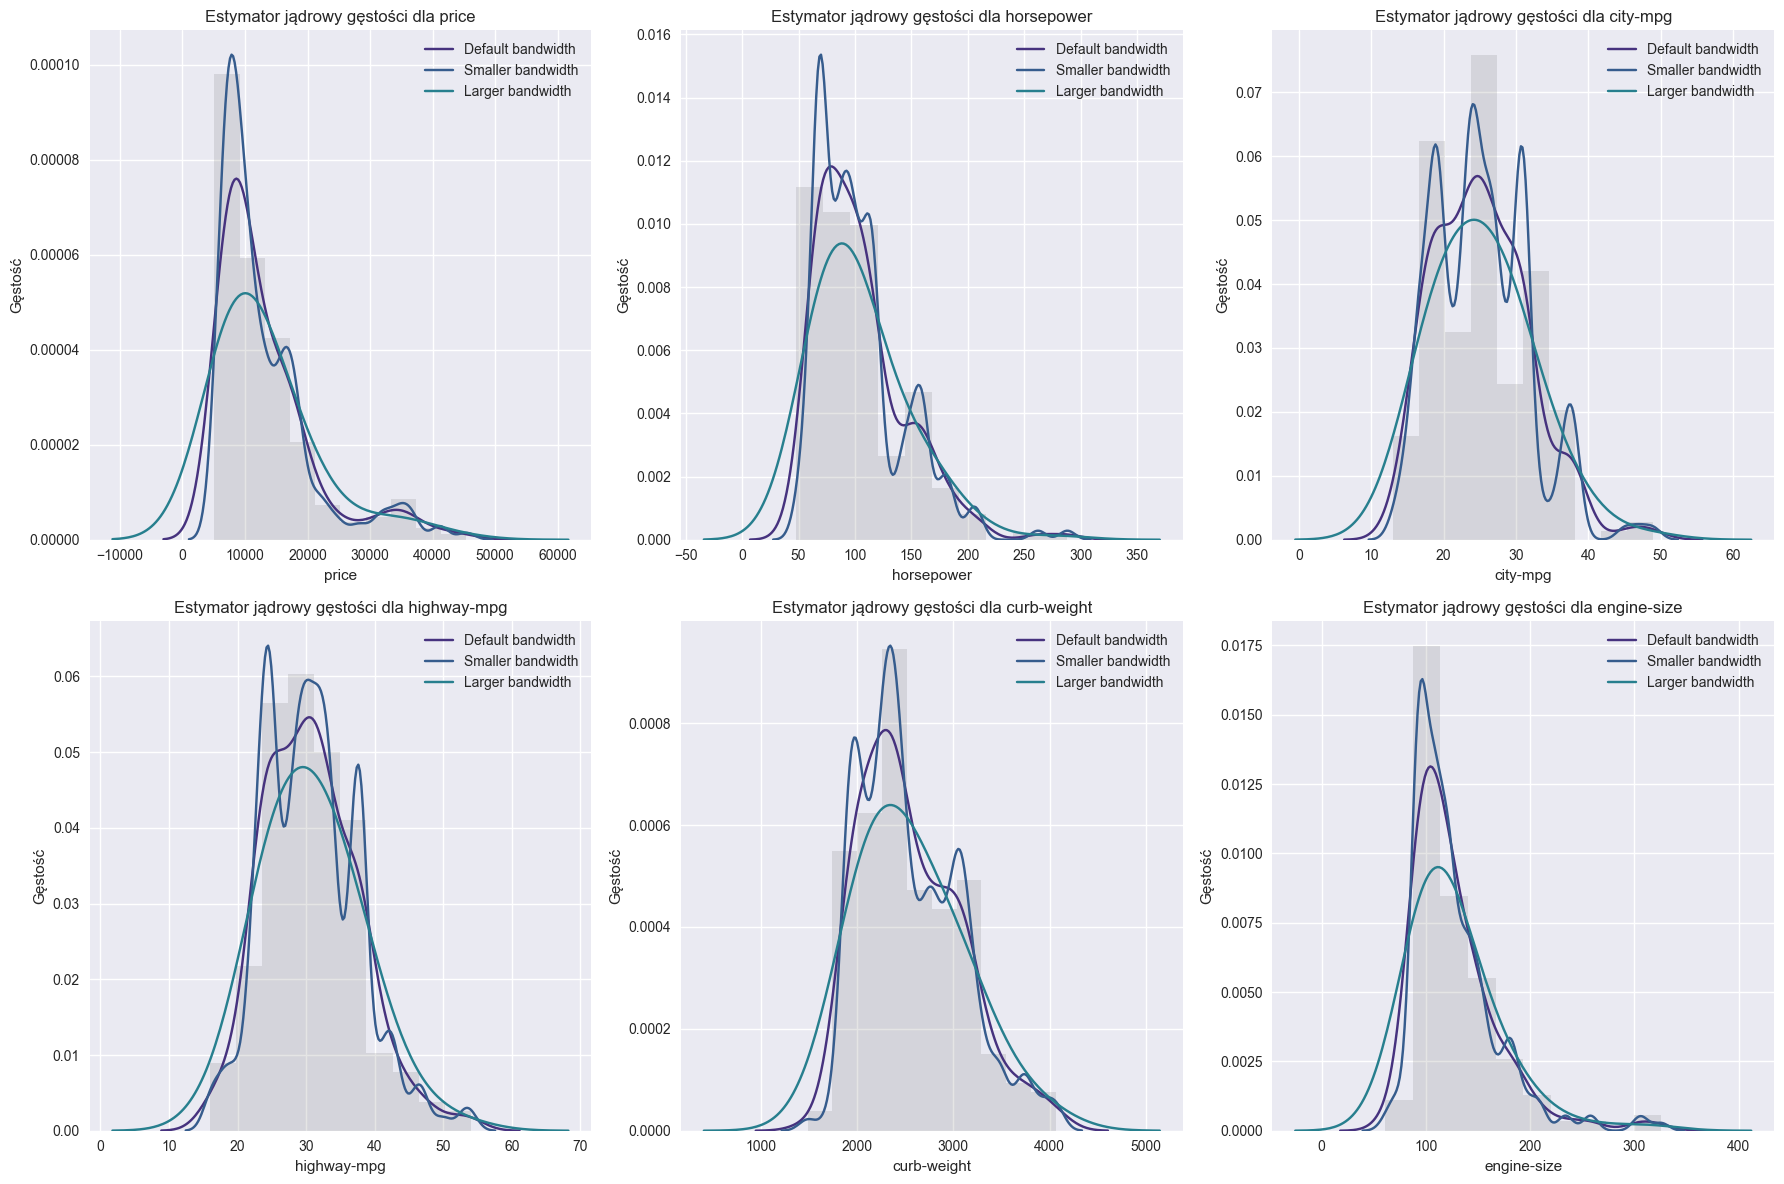

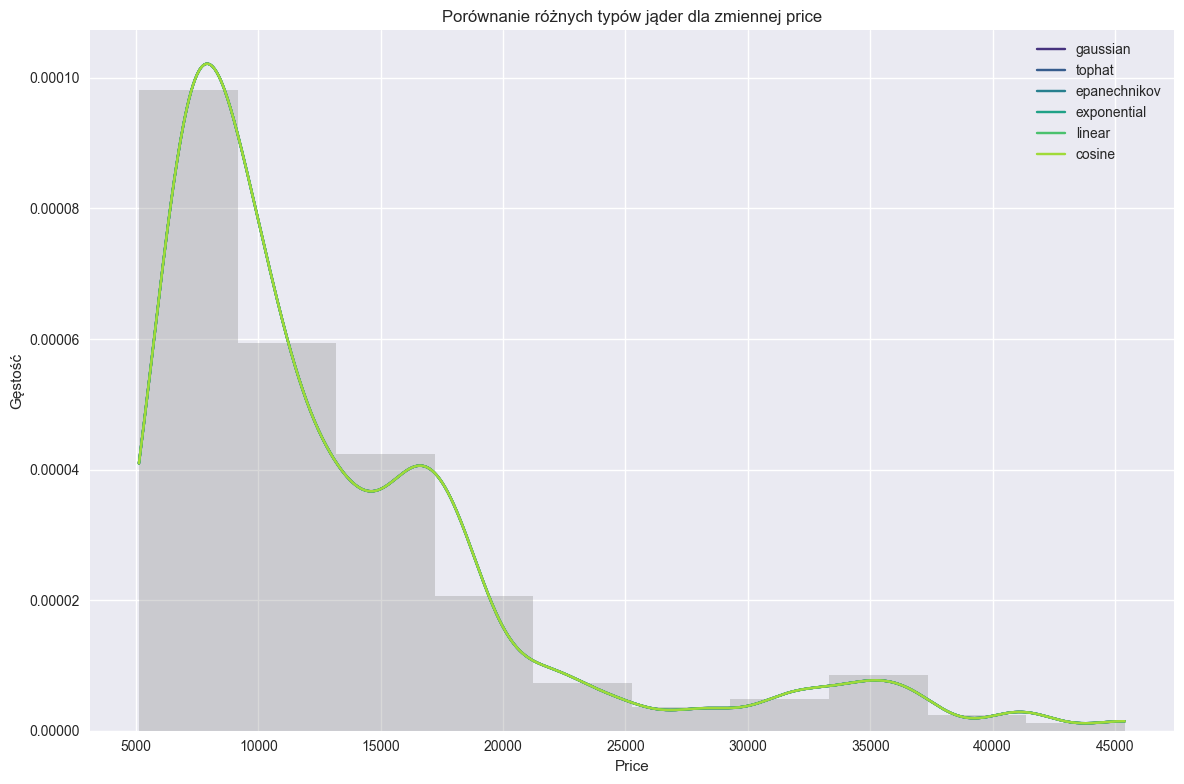

In [14]:
# Estymatory jądrowe gęstości dla wybranych zmiennych
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, var in enumerate(selected_variables):
    # Wykres estymatora jądrowego z różnymi szerokościami pasma (bandwidth)
    sns.kdeplot(df[var], ax=axes[i], label='Default bandwidth')
    sns.kdeplot(df[var], ax=axes[i], bw_adjust=0.5, label='Smaller bandwidth')
    sns.kdeplot(df[var], ax=axes[i], bw_adjust=2.0, label='Larger bandwidth')
    
    # Dodanie histogramu w tle
    axes[i].hist(df[var], density=True, alpha=0.2, color='gray')
    
    axes[i].set_title(f'Estymator jądrowy gęstości dla {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Gęstość')
    axes[i].legend()

plt.tight_layout()
plt.show()

# Porównanie różnych jąder (kerneli) dla wybranej zmiennej
plt.figure(figsize=(12, 8))
x = df['price']

kernels = ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']
for kernel in kernels:
    kde = stats.gaussian_kde(x, bw_method='scott')
    kde.set_bandwidth(kde.factor * 0.5)
    x_grid = np.linspace(x.min(), x.max(), 1000)
    plt.plot(x_grid, kde(x_grid), label=kernel)

plt.hist(x, density=True, alpha=0.3, color='gray')
plt.title('Porównanie różnych typów jąder dla zmiennej price')
plt.xlabel('Price')
plt.ylabel('Gęstość')
plt.legend()
plt.tight_layout()
plt.show()